# kiloJoule Library
We will be using a custom python library, `kilojoule`, written specifically for this course.  The main advantage to this approach is the nomenclature for the functions you will be using in Python will be consistent with the nomenclature from your textbook.  The disadvantage to this approach is there will be limited sources for external tech support (you won't find example code using this library outside of this course).

Prior to using this library, it needs to be installed to a location where the Python interpreter can find it.  If you are using CoClac, this will have already been done for you.  If you are using a local installation of Python you can install the library from the Python Package Index (PyPi) using the command `pip install kilojoule`.  However, the version available through `pip` may not be as up to date as the version installed in your CoCalc account as updates will be applied throughout the course.

After installing the library, you will need to import it into each notebook where you intend to use it.  If you are referring back to this document and want a quick import template for starting a new file, you can use the following code.  If this is your first time reading this document, the code in the following block will be explained in detail below.

In [3]:
from kilojoule.templates.default import *

# Initialize an interface to evaluate fluid properties
# You can create multiple interfaces to differenct fluids as long as they are stored in different variables
air = idealgas.Properties('Air') # Treat air as an ideal gas
water = realfluid.Properties('Water') # Treat water as a real fluid

## Units
The `kilojoule` library is designed to make use of dimensional "quantities" rather than simply doing calculations with numbers.  In engineering, all your calculations use numbers to represent physical quantities and your calculations have no meaning without connection to appropriate units.  By including the physical units as an integral part of the calculation process, we keep the physical significance of our calculation in focus and will avoid costly mistakes from unit conversion errors.  To do this we will make use of the third-party library `pint` for managing units.  By executing the code in the block before this one, you have already loaded this library in the background; it is accessible through the `units` and `Quantity` objects.

We will first define a few property values, i.e. temperature and pressure

In [4]:
# The Quantity(value,'units') notation defines a physical quantity with a magnitude associated with a type of unit
T = Quantity(300.0,'K')
print(T)
print(f'T = {T} = {T.to("degC")} = {T.to("degF")} = {T.to("degR")}')

p = Quantity(1.0,'atm')
print(p)
print(f'p = {p} = {p.to("kPa")} = {p.to("Pa")} = {p.to("psi")} = {p.to("bar")}')

p.ito('kPa')
print(p)

300.0 K
T = 300.0 K = 26.85 °C = 80.33 °F = 540.0 °R
1.0 atm
p = 1.0 atm = 101.33 kPa = 1.0132×10⁵ Pa = 14.696 psi = 1.0133 bar
101.33 kPa


We were able to access the quantities stored in the variables `T` and `p` in any unit system by using the notation `var.to("desired units")`, which temporarily converts the units to the specified form, or we can permanently convert a variable to a different unit system using the notation `var.ito("desired units")`. We defined temperature in metric units, then displayed it in both alternate metric and English units.  Whereas we defined pressure in English units, then displayed it in both alternate English and metric units.  This system allows us to quickly switch back and forth between unit systems as needed.

The real benefit of this system is most evident when we start performing calculations with combined units.  In the following code we will calculate the change in energy of a mass that is changing temperature, velocity, and elevation.
\begin{align}\Delta E_{CV} &= m(\Delta u + \Delta ke + \Delta pe) \\&= m\left(u_2-u_1 + \frac{V_2^2}{2}-\frac{V_1^2}{2} + g(z_2-z_1)\right)\end{align}

In [5]:
%%showcalc
m = Quantity(10.0,'kg')       # mass: metric
u_1 = Quantity(300.0,'kJ/kg') # internal energy: metric
u_2 = Quantity(200.0,'kJ/kg') # internal energy: metric
Vel_1 = Quantity(20.0,'mph')  # velocity: English
Vel_2 = Quantity(30.5,'m/s')  # velocity: metric
g = Quantity(9.8,'m/s^2')     # gravity: metric
z_2 = Quantity(30.1,'ft')     # elevation: English
z_1 = Quantity(1.2,'m')       # elevation: metric

Delta_u = u_2-u_1

Delta_ke = (Vel_2**2-Vel_1**2)/2

Delta_pe = g*(z_2-z_1)

Delta_E_CV = m*(u_2-u_1 + (Vel_2**2-Vel_1**2)/2 + g*(z_2-z_1))

\begin{align}
  m &=  10.0\ \mathrm{kg} 
\end{align}

\begin{align}
  u_{1} &=  300.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}

\begin{align}
  u_{2} &=  200.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}

\begin{align}
  Vel_{1} &=  20.0\ \mathrm{mph} 
\end{align}

\begin{align}
  Vel_{2} &=  30.5\ \frac{\mathrm{m}}{\mathrm{s}} 
\end{align}

\begin{align}
  g &=  9.8\ \frac{\mathrm{m}}{\mathrm{s}^{2}} 
\end{align}

\begin{align}
  z_{2} &=  30.1\ \mathrm{ft} 
\end{align}

\begin{align}
  z_{1} &=  1.2\ \mathrm{m} 
\end{align}

\begin{align}
  \Delta{}u &=   u_{2} - u_{1}  \\
    &=  200.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 300.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= -100.0\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  \Delta{}ke &=  \frac{  {Vel_{2}}^{2} - {Vel_{1}}^{2}  }{ 2 } \\
    &= \frac{  {\left(30.5\ \frac{\mathrm{m}}{\mathrm{s}} \right)}^{2} - {\left(20.0\ \mathrm{mph} \right)}^{2}  }{ 2 }\\
    &= 425.16\ \frac{\mathrm{m}^{2}}{\mathrm{s}^{2}}
\end{align}

\begin{align}
  \Delta{}pe &=   g  \cdot  \left(  z_{2} - z_{1}  \right)  \\
    &=  9.8\ \frac{\mathrm{m}}{\mathrm{s}^{2}}  \cdot  \left(  30.1\ \mathrm{ft} - 1.2\ \mathrm{m}  \right) \\
    &= 256.4\ \frac{\mathrm{ft} \cdot \mathrm{m}}{\mathrm{s}^{2}}
\end{align}

\begin{align}
  \Delta{}E_{CV} &=   m  \cdot  \left(  u_{2} - u_{1}  + \frac{  {Vel_{2}}^{2} - {Vel_{1}}^{2}  }{ 2 } +  g  \cdot  \left(  z_{2} - z_{1}  \right)  \right)  \\
    &=  10.0\ \mathrm{kg}  \cdot  \left(  200.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 300.0\ \frac{\mathrm{kJ}}{\mathrm{kg}}  + \frac{  {\left(30.5\ \frac{\mathrm{m}}{\mathrm{s}} \right)}^{2} - {\left(20.0\ \mathrm{mph} \right)}^{2}  }{ 2 } +  9.8\ \frac{\mathrm{m}}{\mathrm{s}^{2}}  \cdot  \left(  30.1\ \mathrm{ft} - 1.2\ \mathrm{m}  \right)  \right) \\
    &= -994.97\ \mathrm{kJ}
\end{align}



Notice that in the above example, the units for each of the terms were in different systems until they were combined.  

## States Database
Many of the systems we will be analyzing will have many states with multiple properties of interest at each state.  Keeping track of these states and properties in a consistent, organized manner will make your code cleaner and easier to maintain.  To aid in this, the `kilojoule` library provides a data structure designed specifically for this purpose.  The `QuantityTable` behaves similarly to a nested Python dictionary.  You can view the data structure as a table with columns representing properties and rows representing states.  Each property column has a defined unit that will apply to all it's values, i.e. all temperatures stored in $^\circ\text{C}$.  We first need to import the `QuantityTable` class from the `kilojoule.organization` module. *(Note: this will already be loaded if you recently executed the first code block in this notebook and you will not need to perform this step for most examples in this course if you use one of the predefined templates.)*

In [6]:
from kilojoule.organization import QuantityTable

We can now initialize our states database (`QuantityTable(...)`) and store it in a variable where we can easily access it (`states = ...`).  There are a few ways to fill out the table columns with properties and units, but the most straight forward way is to make a dictionary with the desired properties as keys associated with the appropriate units (`properties_dict = {'property symbol':'units', ...}`).  Note: a few templates, such as the one you imported at the beginning of this notebook, provide pre-built tables for common variables used in this course to make this process easier. *(Note: again, you will not need to perform this step for most examples in this course if you use one of the predefined templates.)*

In [7]:
# Make a dictionary with the types of properties you want to track and units for each property
properties_dict = {
    'T':'degC',         # Temperature: unit options ('K','degC','degF','degR')
    'p':'kPa',          # pressure: unit options ('kPa','bar','psi','atm',etc.)
    'v':'m^3/kg',       # specific volume
    'u':'kJ/kg',        # specific internal energy
    'h':'kJ/kg',        # specific enthalpy
    's':'kJ/kg/K',      # specific entropy
    'x':'',             # quality: dimensionless units enter as an empty string
}

# Make a database to hold the property values for each state and store in the variable name `states`
states = QuantityTable(properties=properties_dict)

# The states container is initially empty
print(states)

Empty DataFrame
Columns: []
Index: []


The table will initially be empty, be we can add property values for different states to it on the fly.  Recall that we defined preferred units for each of the property columns.  In the example below we will define some temperatures and pressures in consistent units, inconsistent units, and with missing units.

In [8]:
states[1,'T'] = Quantity(30,'degC') # consistent units
states[2,'p'] = Quantity(1,'atm')   # inconsistent units (will be converted kPa)
states[3,'T'] = 100                 # missing units (assumed to be degC)
states[3,'p'] = 200                 # missing units (assumed to be kPa)

print(states)

       T        p
1   30.0        -
2      -  101.325
3  100.0    200.0


Notice that we originally defined the temperature column to have units of $^\circ\text{C}$, then we explicitly defined a temperature quantity with units of $^\circ\text{C}$ and placed it in state 1 in the temperature column (`states[state, property] = value`).  We then defined a pressure for state 2, but we used an inconsistent unit, i.e. we defined it in $\text{atm}$ when the column expected $\text{kPa}$.  When we view the contents of the states database (`print(states)`) we see that the pressure value at state 2 was automatically converted to $\text{kPa}$.  Finally we defined a temperature and pressure for state 3 without explicitly stating the units.  When this happens, it will be assumed that the values are already in the preferred units.  While this makes the syntax shorter, it is not a good practice since changes in other parts of the code could have unexpected consequences.

An alternate (shorter) syntax for working with the values in the table can be enabled by assigning each column in the table to a variable in the local namespace.  After executing the code below, we will be able to set the quality at state 2 to 50% with the code `x[2] = 0.5` rather than needing to type `states[1,'x'] = 0.5`. Note: this step will also be performed for you if you import one of the pre-built templates.

In [9]:
# The following lines will define (overwrite) convenience variables in the local name space for each of the properties in the states container
# This allows you to add values to (or pull values from) the database using the nomenclature T[1], T[2], p[3], etc.
for property in states.properties:
    globals()[property] = states.dict[property]

x[2] = 0.5
T['inlet'] = Quantity(25,'degC')
print(states)

           T        p    x
1       30.0        -    -
2          -  101.325  0.5
3      100.0    200.0    -
inlet   25.0        -    -


The preferred units for each property column can be changed at any time using the `.set_units()` method and all values in that column will be automatically converted to the new units

In [10]:
T.set_units('degF')
p.set_units('psi')
states.display()

T.set_units('K')
p.set_units('Pa')
states.display()

T.set_units('degC')
p.set_units('kPa')
states.display()

,$T$ [°F],$p$ [psi],$x$ []
1,86.0,-,-
2,-,14.695949,0.5
3,212.0,29.007548,-
inlet,77.0,-,-


,$T$ [K],$p$ [Pa],$x$ []
1,303.15,-,-
2,-,101325.0,0.5
3,373.15,200000.0,-
inlet,298.15,-,-


,$T$ [°C],$p$ [kPa],$x$ []
1,30.0,-,-
2,-,101.325,0.5
3,100.0,200.0,-
inlet,25.0,-,-


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>$T$ [°C]</th>\n      <th>$p$ [kPa]</th>\n      <th>$x$ []</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>30.0</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>-</td>\n      <td>101.325</td>\n      <td>0.5</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>100.0</td>\n      <td>200.0</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>inlet</th>\n      <td>25.0</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n  </tbody>\n</table>'

## Properties
During our calculations for this course, we will often need to evaluate material/fluid properties at various states.  The traditional method for doing this is to read values from a table that will often involve interpolation (sometimes even double interpolation).  You will still be expected to know how to use the property tables for this course (especially during exams), but you will also be expected to use tools that automate this procedure so you can investigate more complex problems that are not easily solved through hand calculations.  

This will be achieved using third-party Libraries: `CoolProp` for real-fluid properties and `PYroMat` for ideal-gas properties.  Each of these libraries can be used directly in Python without loading the `kilojoule` package.  However, we will be primarily using a wrapper for theses libraries provided by the `kilojoule` package, which incorporates the `pint` package to handle a wider range of units and also renames a number of parameters to be consistent with the nomenclature we will be using in this course.

### Water Properties
In the first code block at the top of this notebook, you imported the `realfluid` class from the `kilojoule` library.  This module contains a `Properties` class that can be used to evaluate the properties of a number of real (*pure/pseudopure*) fluids.  You are already familiar with looking up properties for water from the tables from your Thermo I course.  Recall that for a pure substance you need two independent, intensive properties to fix a state, i.e. if you know two independent properties you can find any other property that you need for the state *(Note: there is a little more to the story here, but we will get to that later in the course)*.  For now, let's say we have water at $T_1=300^\circ\text{C}$ and $p_1=750\,\text{kPa}$ and we would like to find the specific volume, $v$, specific internal energy, $u$, specific enthalpy, $h$, and  specific entropy, $s$.  For each of these cases, we could say the desired (dependent) property is a function of the two known (independent) properties:
$$v_1 = v(T=300^\circ\text{C}, p=750\,\text{kPa})$$
$$u_1 = u(T=300^\circ\text{C}, p=750\,\text{kPa})$$
$$h_1 = h(T=300^\circ\text{C}, p=750\,\text{kPa})$$
$$s_1 = s(T=300^\circ\text{C}, p=750\,\text{kPa})$$
In order to use the `kilojoule.realfluid.Properties` class, we first need to instantiate it (Python-speak for initialize the class and store in a variable).  The following code block will import the class (if needed), set the target fluid to be water, and set the default unit system to be metric with temperatures in $^\circ\text{C}$

In [11]:
from kilojoule.templates.default import *
from kilojoule import realfluid

water = realfluid.Properties('Water', unit_system='kSI_C') # the default unit_system is 'kSI_C' other options are 'SI', 'SI_C', kSI', 'USCS_F', and 'USCS_R'

The `water` object now has sub-functions (or methods) that can be used to evaluate (look up) dependent properties.

In [12]:
%%showcalc
"Define known values (independent properties)"
T[1] = Quantity(300.0,'degC')
p[1] = Quantity(750.0,'kPa')

"Look up dependent properties corresponding to $T_1$ and $p_1$"
"specific volume"
v[1] = water.v(T=T[1], p=p[1])

"specific internal energy"
u[1] = water.u(T=T[1], p=p[1])

"specific enthalpy"
h[1] = water.h(T=T[1], p=p[1])

"specific entropy"
s[1] = water.s(T=T[1], p=p[1])

"quality"
x[1] = water.x(T=T[1], p=p[1])

"phase"
phase[1] = water.phase(T=T[1], p=p[1])

Define known values (independent properties)
\begin{align}
  {T}_{ 1 } &=  300.0\ \mathrm{°C}  = 573.15\ \mathrm{K} 
\end{align}

\begin{align}
  {p}_{ 1 } &=  750.0\ \mathrm{kPa} 
\end{align}

Look up dependent properties corresponding to $T_1$ and $p_1$
specific volume
\begin{align}
  {v}_{ 1 } &=  \mathrm{ \underset{ water }{ v } }\left( \mathrm{ T } = {T}_{ 1 }, \mathrm{ p } = {p}_{ 1 } \right)  = \mathrm{ \underset{ water }{ v } }\left( \mathrm{ T } = 573.15\ \mathrm{K}, \mathrm{ p } = 750.0\ \mathrm{kPa} \right) = 0.34621\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

specific internal energy
\begin{align}
  {u}_{ 1 } &=  \mathrm{ \underset{ water }{ u } }\left( \mathrm{ T } = {T}_{ 1 }, \mathrm{ p } = {p}_{ 1 } \right)  = \mathrm{ \underset{ water }{ u } }\left( \mathrm{ T } = 573.15\ \mathrm{K}, \mathrm{ p } = 750.0\ \mathrm{kPa} \right) = 2798.5\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

specific enthalpy
\begin{align}
  {h}_{ 1 } &=  \mathrm{ \underset{ water }{ h } }\left( \mathrm{ T } = {T}_{ 1 }, \mathrm{ p } = {p}_{ 1 } \right)  = \mathrm{ \underset{ water }{ h } }\left( \mathrm{ T } = 573.15\ \mathrm{K}, \mathrm{ p } = 750.0\ \mathrm{kPa} \right) = 3058.2\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

specific entropy
\begin{align}
  {s}_{ 1 } &=  \mathrm{ \underset{ water }{ s } }\left( \mathrm{ T } = {T}_{ 1 }, \mathrm{ p } = {p}_{ 1 } \right)  = \mathrm{ \underset{ water }{ s } }\left( \mathrm{ T } = 573.15\ \mathrm{K}, \mathrm{ p } = 750.0\ \mathrm{kPa} \right) = 7.2659\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

quality
\begin{align}
  {x}_{ 1 } &=  \mathrm{ \underset{ water }{ x } }\left( \mathrm{ T } = {T}_{ 1 }, \mathrm{ p } = {p}_{ 1 } \right)  = \mathrm{ \underset{ water }{ x } }\left( \mathrm{ T } = 573.15\ \mathrm{K}, \mathrm{ p } = 750.0\ \mathrm{kPa} \right) = N/A
\end{align}

phase
\begin{align}
  {phase}_{ 1 } &=  \mathrm{ \underset{ water }{ phase } }\left( \mathrm{ T } = {T}_{ 1 }, \mathrm{ p } = {p}_{ 1 } \right)  = \mathrm{ \underset{ water }{ phase } }\left( \mathrm{ T } = 573.15\ \mathrm{K}, \mathrm{ p } = 750.0\ \mathrm{kPa} \right) = gas
\end{align}



In [13]:
states.display()

,$T$ [K],$p$ [kPa],$v$ [m³/kg],$u$ [kJ/kg],$h$ [kJ/kg],$s$ [kJ/K/kg],$x$ [],$phase$ []
1,573.15,750.0,0.346214,2798.496371,3058.156633,7.26594,N/A,gas


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>$T$ [K]</th>\n      <th>$p$ [kPa]</th>\n      <th>$v$ [m³/kg]</th>\n      <th>$u$ [kJ/kg]</th>\n      <th>$h$ [kJ/kg]</th>\n      <th>$s$ [kJ/K/kg]</th>\n      <th>$x$ []</th>\n      <th>$phase$ []</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>573.15</td>\n      <td>750.0</td>\n      <td>0.346214</td>\n      <td>2798.496371</td>\n      <td>3058.156633</td>\n      <td>7.26594</td>\n      <td>N/A</td>\n      <td>gas</td>\n    </tr>\n  </tbody>\n</table>'

Notice the quality, $x_1$, was reported to be `N/A` because the substance is a single-phase, superheated vapor at state 1, so the quality is not defined for this state.  

We can also use the same functions for evaluating the properties of saturated fluids.  Let's assume the fluid from state 1 in the above example is cooled at a constant pressure until it is entirely in liquid form, i.e. $x_2=0$.  We could then find all the remaining properties at state 2 as well.
$$ p_2 = p_1 $$
$$ T_2 = T(p=p_2, x=x_2) $$
$$ v_2 = v(p=p_2, x=x_2) $$
$$ u_2 = u(p=p_2, x=x_2) $$
$$ h_2 = h(p=p_2, x=x_2) $$
$$ s_2 = x(p=p_2, x=x_2) $$

In [14]:
%%showcalc
"Independent properties that fix state 2"
p[2] = p[1]
x[2] = 0

"Dependent properties corresponding to $p[2]$ and $x[2]$"
T[2] = water.T(p=p[2], x=x[2])
v[2] = water.v(p=p[2], x=x[2])
u[2] = water.u(p=p[2], x=x[2])
h[2] = water.h(p=p[2], x=x[2])
s[2] = water.s(p=p[2], x=x[2])
phase[2] = water.phase(p=p[2],x=x[2])

Independent properties that fix state 2
\begin{align}
  {p}_{ 2 } &=  {p}_{ 1 }  = 750.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {x}_{ 2 } &=  0 
\end{align}

Dependent properties corresponding to $p[2]$ and $x[2]$
\begin{align}
  {T}_{ 2 } &=  \mathrm{ \underset{ water }{ T } }\left( \mathrm{ p } = {p}_{ 2 }, \mathrm{ x } = {x}_{ 2 } \right)  = \mathrm{ \underset{ water }{ T } }\left( \mathrm{ p } = 750.0\ \mathrm{kPa}, \mathrm{ x } = 0 \right) = 440.9\ \mathrm{K}
\end{align}

\begin{align}
  {v}_{ 2 } &=  \mathrm{ \underset{ water }{ v } }\left( \mathrm{ p } = {p}_{ 2 }, \mathrm{ x } = {x}_{ 2 } \right)  = \mathrm{ \underset{ water }{ v } }\left( \mathrm{ p } = 750.0\ \mathrm{kPa}, \mathrm{ x } = 0 \right) = 0.0011114\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {u}_{ 2 } &=  \mathrm{ \underset{ water }{ u } }\left( \mathrm{ p } = {p}_{ 2 }, \mathrm{ x } = {x}_{ 2 } \right)  = \mathrm{ \underset{ water }{ u } }\left( \mathrm{ p } = 750.0\ \mathrm{kPa}, \mathrm{ x } = 0 \right) = 708.4\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ 2 } &=  \mathrm{ \underset{ water }{ h } }\left( \mathrm{ p } = {p}_{ 2 }, \mathrm{ x } = {x}_{ 2 } \right)  = \mathrm{ \underset{ water }{ h } }\left( \mathrm{ p } = 750.0\ \mathrm{kPa}, \mathrm{ x } = 0 \right) = 709.24\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 2 } &=  \mathrm{ \underset{ water }{ s } }\left( \mathrm{ p } = {p}_{ 2 }, \mathrm{ x } = {x}_{ 2 } \right)  = \mathrm{ \underset{ water }{ s } }\left( \mathrm{ p } = 750.0\ \mathrm{kPa}, \mathrm{ x } = 0 \right) = 2.0195\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {phase}_{ 2 } &=  \mathrm{ \underset{ water }{ phase } }\left( \mathrm{ p } = {p}_{ 2 }, \mathrm{ x } = {x}_{ 2 } \right)  = \mathrm{ \underset{ water }{ phase } }\left( \mathrm{ p } = 750.0\ \mathrm{kPa}, \mathrm{ x } = 0 \right) = twoph
\end{align}



Notice the phase for state 2 is reported as `twophase`, even though we know it is entirely liquid because the quality is 0.  This state would be more accurately described as a saturated-liquid, but the `CoolProp` library reports all saturated states (saturated liquid, saturated mixture, and saturated vapor) as `twophase`.  

Let's now calculate a third state that would be obtained from an isenthalpic expansion to $p_3=100\,\text{kPa}$ resulting in a saturated mixture.
$$ h_3 = h_2 $$
$$ p_3 = 100\,\text{kPa} $$
$$ T_3 = T(p=p_3, h=h_3) $$
$$ v_3 = v(p=p_3, h=h_3) $$
$$ u_3 = u(p=p_3, h=h_3) $$
$$ x_3 = x(p=p_3, h=h_3) $$
$$ s_3 = x(p=p_3, h=h_3) $$

In [15]:
%%showcalc
"Independent properties that fix the state"
h[3] = h[2]
p[3] = Quantity(100.0,'kPa')

"Dependent properties corresponding to $p_3$ and $h_3$"
T[3] = water.T(p=p[3], h=h[3])
v[3] = water.v(p=p[3], h=h[3])
u[3] = water.u(p=p[3], h=h[3])
x[3] = water.x(p=p[3], h=h[3])
s[3] = water.s(p=p[3], h=h[3])
phase[3] = water.phase(p=p[3], h=h[3])

Independent properties that fix the state
\begin{align}
  {h}_{ 3 } &=  {h}_{ 2 }  = 709.24\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}

\begin{align}
  {p}_{ 3 } &=  100.0\ \mathrm{kPa} 
\end{align}

Dependent properties corresponding to $p_3$ and $h_3$
\begin{align}
  {T}_{ 3 } &=  \mathrm{ \underset{ water }{ T } }\left( \mathrm{ p } = {p}_{ 3 }, \mathrm{ h } = {h}_{ 3 } \right)  = \mathrm{ \underset{ water }{ T } }\left( \mathrm{ p } = 100.0\ \mathrm{kPa}, \mathrm{ h } = 709.24\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 372.76\ \mathrm{K}
\end{align}

\begin{align}
  {v}_{ 3 } &=  \mathrm{ \underset{ water }{ v } }\left( \mathrm{ p } = {p}_{ 3 }, \mathrm{ h } = {h}_{ 3 } \right)  = \mathrm{ \underset{ water }{ v } }\left( \mathrm{ p } = 100.0\ \mathrm{kPa}, \mathrm{ h } = 709.24\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 0.21982\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {u}_{ 3 } &=  \mathrm{ \underset{ water }{ u } }\left( \mathrm{ p } = {p}_{ 3 }, \mathrm{ h } = {h}_{ 3 } \right)  = \mathrm{ \underset{ water }{ u } }\left( \mathrm{ p } = 100.0\ \mathrm{kPa}, \mathrm{ h } = 709.24\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 687.25\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {x}_{ 3 } &=  \mathrm{ \underset{ water }{ x } }\left( \mathrm{ p } = {p}_{ 3 }, \mathrm{ h } = {h}_{ 3 } \right)  = \mathrm{ \underset{ water }{ x } }\left( \mathrm{ p } = 100.0\ \mathrm{kPa}, \mathrm{ h } = 709.24\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 0.12923
\end{align}

\begin{align}
  {s}_{ 3 } &=  \mathrm{ \underset{ water }{ s } }\left( \mathrm{ p } = {p}_{ 3 }, \mathrm{ h } = {h}_{ 3 } \right)  = \mathrm{ \underset{ water }{ s } }\left( \mathrm{ p } = 100.0\ \mathrm{kPa}, \mathrm{ h } = 709.24\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 2.0854\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {phase}_{ 3 } &=  \mathrm{ \underset{ water }{ phase } }\left( \mathrm{ p } = {p}_{ 3 }, \mathrm{ h } = {h}_{ 3 } \right)  = \mathrm{ \underset{ water }{ phase } }\left( \mathrm{ p } = 100.0\ \mathrm{kPa}, \mathrm{ h } = 709.24\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = twoph
\end{align}



In [42]:
states.display();

,$T$ [°C],$p$ [kPa],$v$ [m³/kg_a],$h$ [kJ/kg_a],$h_{w}$ [Btu/lb_water],$s$ [kJ/K/kg_a],$T_{wb}$ [°C],$T_{dp}$ [°C],$rel_{hum}$ [],$\omega$ [kg_water/kg_a]
1,30,101.325,0.876956,64.355677,-,0.228260,22.000878,-,0.5,0.013373
2,10,101.325,0.811596,29.354502,18.107863,0.107866,10.000000,10.0,1.0,0.007663


#### Short-form Notation for Property Evaluation
The procedure illustrated above is somewhat repetitive and can be shortened in a few ways.  For each call to the `water.property()` object, we explicitly told the function both the type and value of each of the argments passed to it (or in Python lingo, we gave both a keyword and an argument).  However, we can take advantage of the units associated with each of the variables to infer the appropriate property type, i.e. if the argument has units of $kPa$ we can safely assume the appropriate keyword should be `p` for pressure.  Therefore, we could shorten the line `T[3] = water.T(p=p[3], x=x[3])` to `T[3] = water.T(p[3], x[3])`.  

**Note: the approach will not work when passing an internal energy or enthalpy argument because they share the same units and you must use the long-from notation, i.e. (...,u=u[3]) or (..., h=h[3]).** 

Also, since we are using the same two independent properties for each of the dependent property calls, we could use a loop to automate the process.  The command `states.fix(3, water, p[3], x[3])` will attempt to use the specified `water` property table to evaluate all missing properties at state `3` using `p[3]` and `x[3]`.

To illustrate this, let's calculate a fourth state that would be obtained from an isobaric expansion to a temperature of $T_4=150^\circ \mathrm{C}$.
$$ p_4 = p_3 $$
$$ T_4 = 150^\circ\mathrm{C} $$

In [17]:
%%showcalc
"Independent properties that fix the state"
p[4] = p[3]
T[4] = Quantity(150.0,'degC')

"Dependent properties corresponding to $T_4$ and $p_4$"
"using short-form notation"
v[4] = water.v(T[4], p[4])

"or using `states.fix(4,water)` fill in the rest of the table"
states.fix(4, water, T[4], p[4]) 

Independent properties that fix the state
\begin{align}
  {p}_{ 4 } &=  {p}_{ 3 }  = 100.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {T}_{ 4 } &=  150.0\ \mathrm{°C}  = 423.15\ \mathrm{K} 
\end{align}

Dependent properties corresponding to $T_4$ and $p_4$
using short-form notation
\begin{align}
  {v}_{ 4 } &=  \mathrm{ \underset{ water }{ v } }\left( {T}_{ 4 }, {p}_{ 4 } \right)  = \mathrm{ \underset{ water }{ v } }\left( 423.15\ \mathrm{K}, 100.0\ \mathrm{kPa} \right) = 1.9367\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

or using `states.fix(4,water)` fill in the rest of the table


Fixing state 4 using $T=423.15\ \mathrm{K}$, $p=100.0\ \mathrm{kPa}$
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>$T$ [K]</th>
      <th>$p$ [kPa]</th>
      <th>$v$ [m³/kg]</th>
      <th>$u$ [kJ/kg]</th>
      <th>$h$ [kJ/kg]</th>
      <th>$s$ [kJ/K/kg]</th>
      <th>$x$ []</th>
      <th>$phase$ []</th>
      <th>$c_{v}$ [kJ/K/kg]</th>
      <th>$c_{p}$ [kJ/K/kg]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>4</th>
      <td>423.15</td>
      <td>100.0</td>
      <td>1.93665</td>
      <td>2582.937555</td>
      <td>2776.602582</td>
      <td>7.614753</td>
      <td>N/A</td>
      <td>gas</td>
      <td>1.495922</td>
      <td>1.984639</td>
    </tr>
  </tbody>
</table>
<br />


In [43]:
states.display();

,$T$ [°C],$p$ [kPa],$v$ [m³/kg_a],$h$ [kJ/kg_a],$h_{w}$ [Btu/lb_water],$s$ [kJ/K/kg_a],$T_{wb}$ [°C],$T_{dp}$ [°C],$rel_{hum}$ [],$\omega$ [kg_water/kg_a]
1,30,101.325,0.876956,64.355677,-,0.228260,22.000878,-,0.5,0.013373
2,10,101.325,0.811596,29.354502,18.107863,0.107866,10.000000,10.0,1.0,0.007663


If you run the `states.fix(...)` command without providing two independent intensive properties, it will try to use the information already in the table as independent properties to fill in the empty columns.  However, if you have inconsistent values in the table this can lead to unexpected results and is not encouraged.


#### Plotting Property Diagrams
It is often helpful to visualize processes by plotting the states on property diagrams, i.e. $T$-$s$, $p$-$v$, $p$-$h$, etc.  The `kilojoule` library provides a `.property_diagram()` method for each of the fluid property tables that can create common property diagrams used in thermodynamics.  This class uses the popular `matplotlib` library.  You first instantiate the class by telling it which properties you want represented on the $x$ and $y$ axes and the unit system (if not using the default/same units as the table).  You can also use the `saturation` parameter to specify whether or not to draw the saturation curves (the default is `True` for real fluids). 

In the following code, we will store a plot object (instance of the `PropertyPlot` class) in the variable `Ts`. 
> `Ts = water.property_diagram(x='s', y='T', unit_system='USCS_F', saturation=True)`

The `Ts` object contains a `matplotlib` figure and axis stored as attributes accessible at `Ts.fig` and `Ts.ax`.  We can use any `matplotlib` functions on these objects to add features to the diagram (many examples are available on the internet).  However, there are a few custom `matplotlib` routines built into the `PropertyPlot` class, which will make it easier to show visualize the process we will be analyzing.  

The simplest built-in construct is the `.plot_point(x, y, label='label', label_loc='north')` method, which places a dot at the $x$, $y$ coordinates with an optional label placed at the relative location provided (default is north)
> `Ts.plot_point(x=s[1], y=T[1], label='1', label_loc='north')`

An alternate interface is also available if your data is stored in the `QuantityTable()` class described above.
> `Ts.plot_state(states[2])`  
> `Ts.plot_state(states[3])`

We also like to draw lines connecting states to illustrate processes.  However, we do not want to simply draw straight lines connecting the points.  Rather, we would like the path of the line to represent the process properties at all points.  We can do this if we know something that was constant during the process, ie. pressure was constant from 1 to 2 and enthalpy was constant from 2 to 3 in our earlier example.  The `.plot_process()` method accepts two states and a path description to achieve this:
>`Ts.plot_process(states[1], states[2], path='isobaric')`  
>`Ts.plot_process(states[2], states[3], path='isenthalpic')`

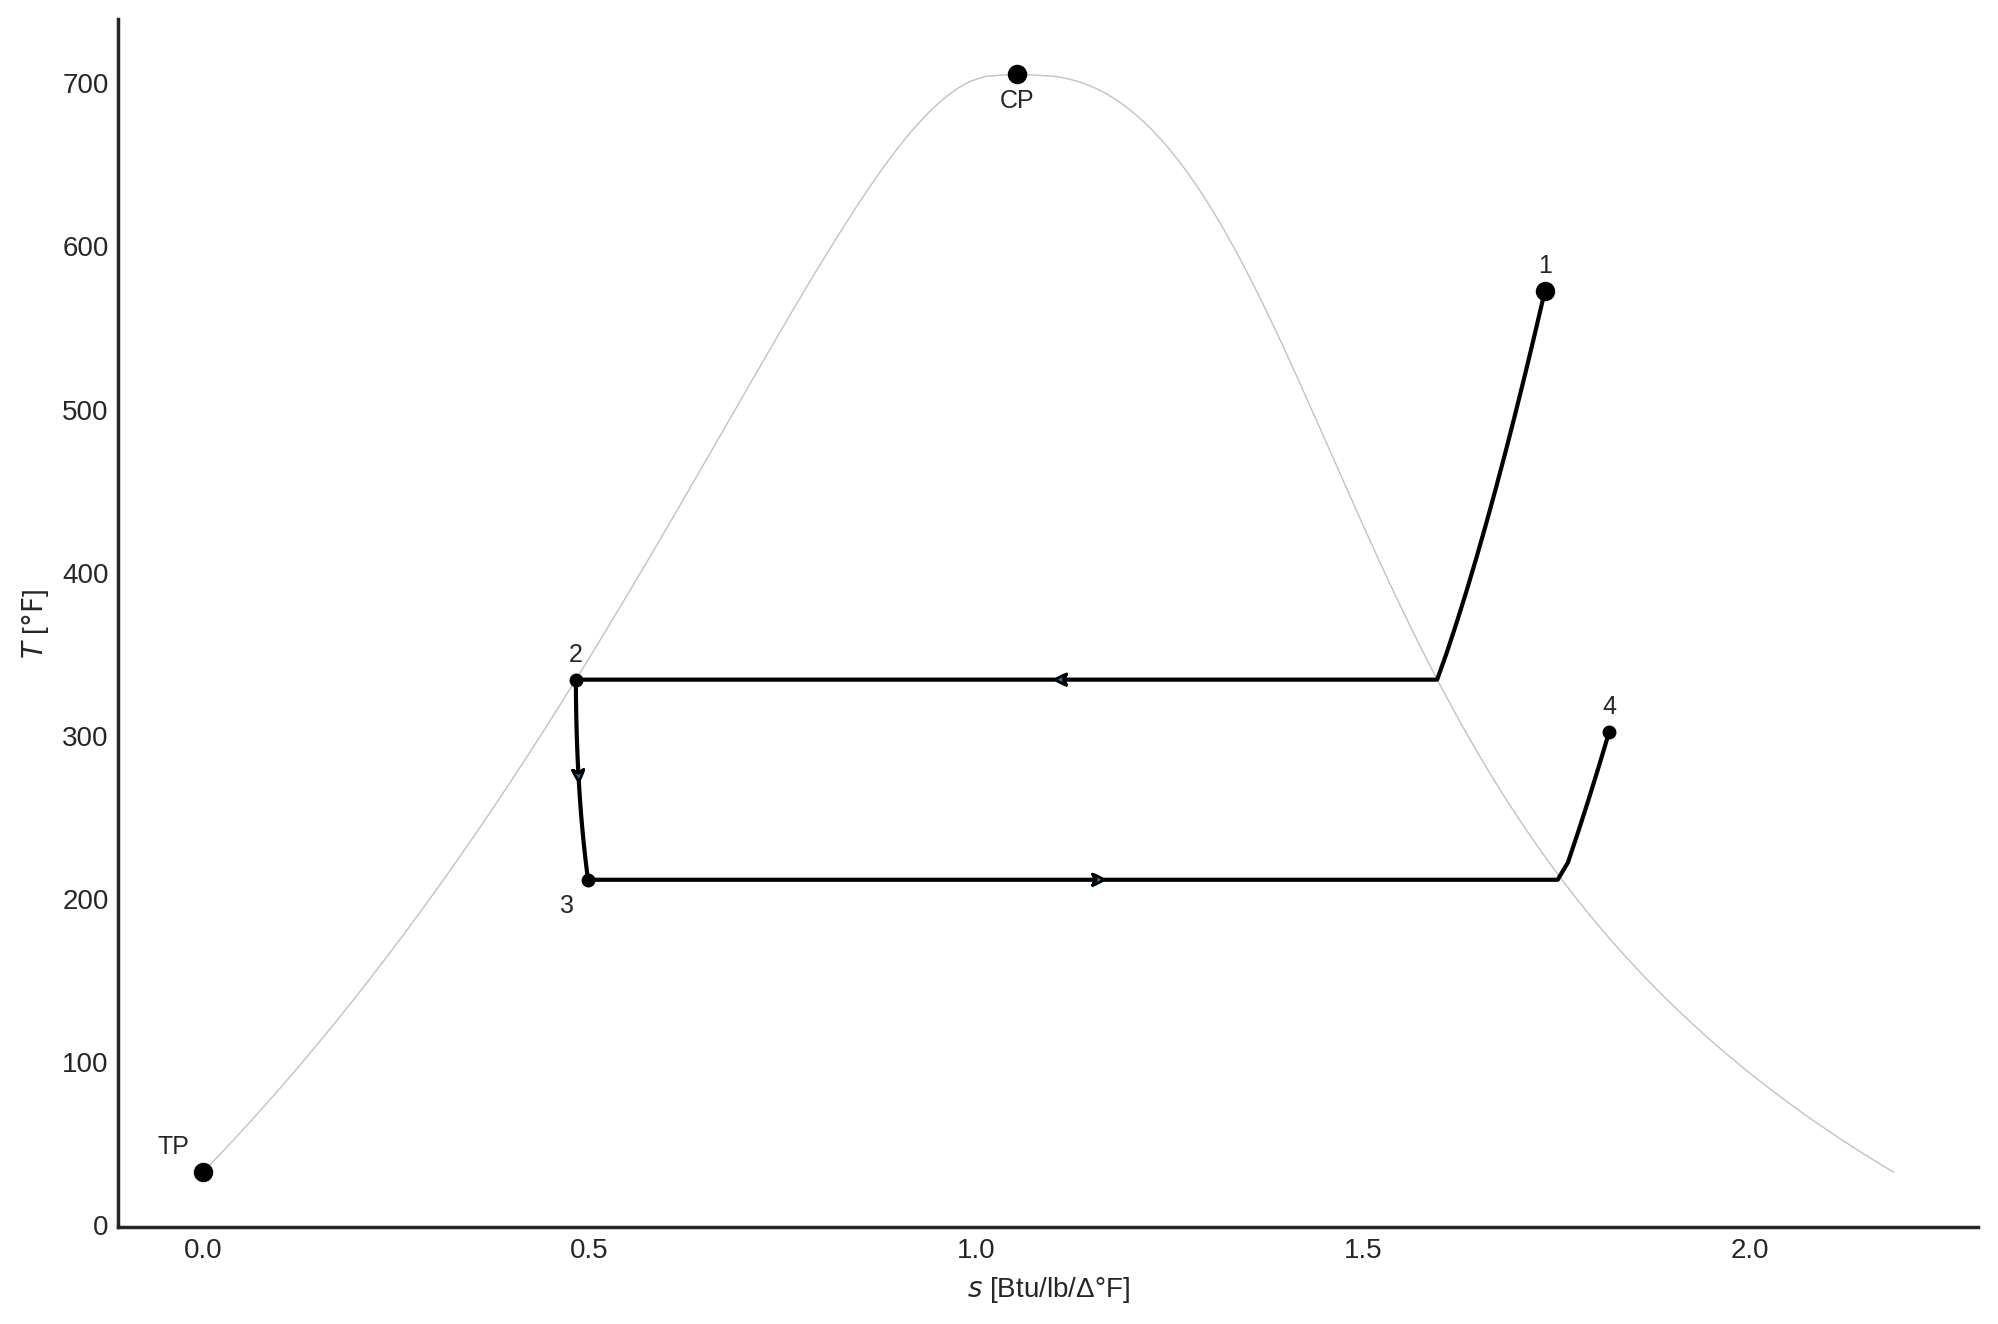

In [19]:
# Create Ts_diagram instance
Ts = water.property_diagram(x='s', y='T', unit_system='English_F', saturation=True)

# Plot Critial and Triple Points
Ts.plot_triple_point(label='TP',label_loc='northwest')
Ts.plot_critical_point(label_loc='south')

# Plot State 1 using the .plot_point() method
Ts.plot_point(x=s[1], y=T[1], label='1', label_loc='north')

# Plot States 2 and 3 using the .plot_state() method
Ts.plot_state(states[2])
Ts.plot_state(states[3], label_loc='south west')
Ts.plot_state(states[4])

# Connect the states with lines that illustrate the process paths
Ts.plot_process(states[1], states[2], path='isobaric')
Ts.plot_process(states[2], states[3], path='isenthalpic')
Ts.plot_process(states[3], states[4], path='isobaric');

We can use this same process to also create additional plots for our system by changing the parameters when we call the `.property_diagram()` method, or we can shorten the syntax if we use one of the buit-in property combinations `pv_diagram, Ts_diagram, Tv_diagram, hs_diagram, ph_diagram, pT_diagram`

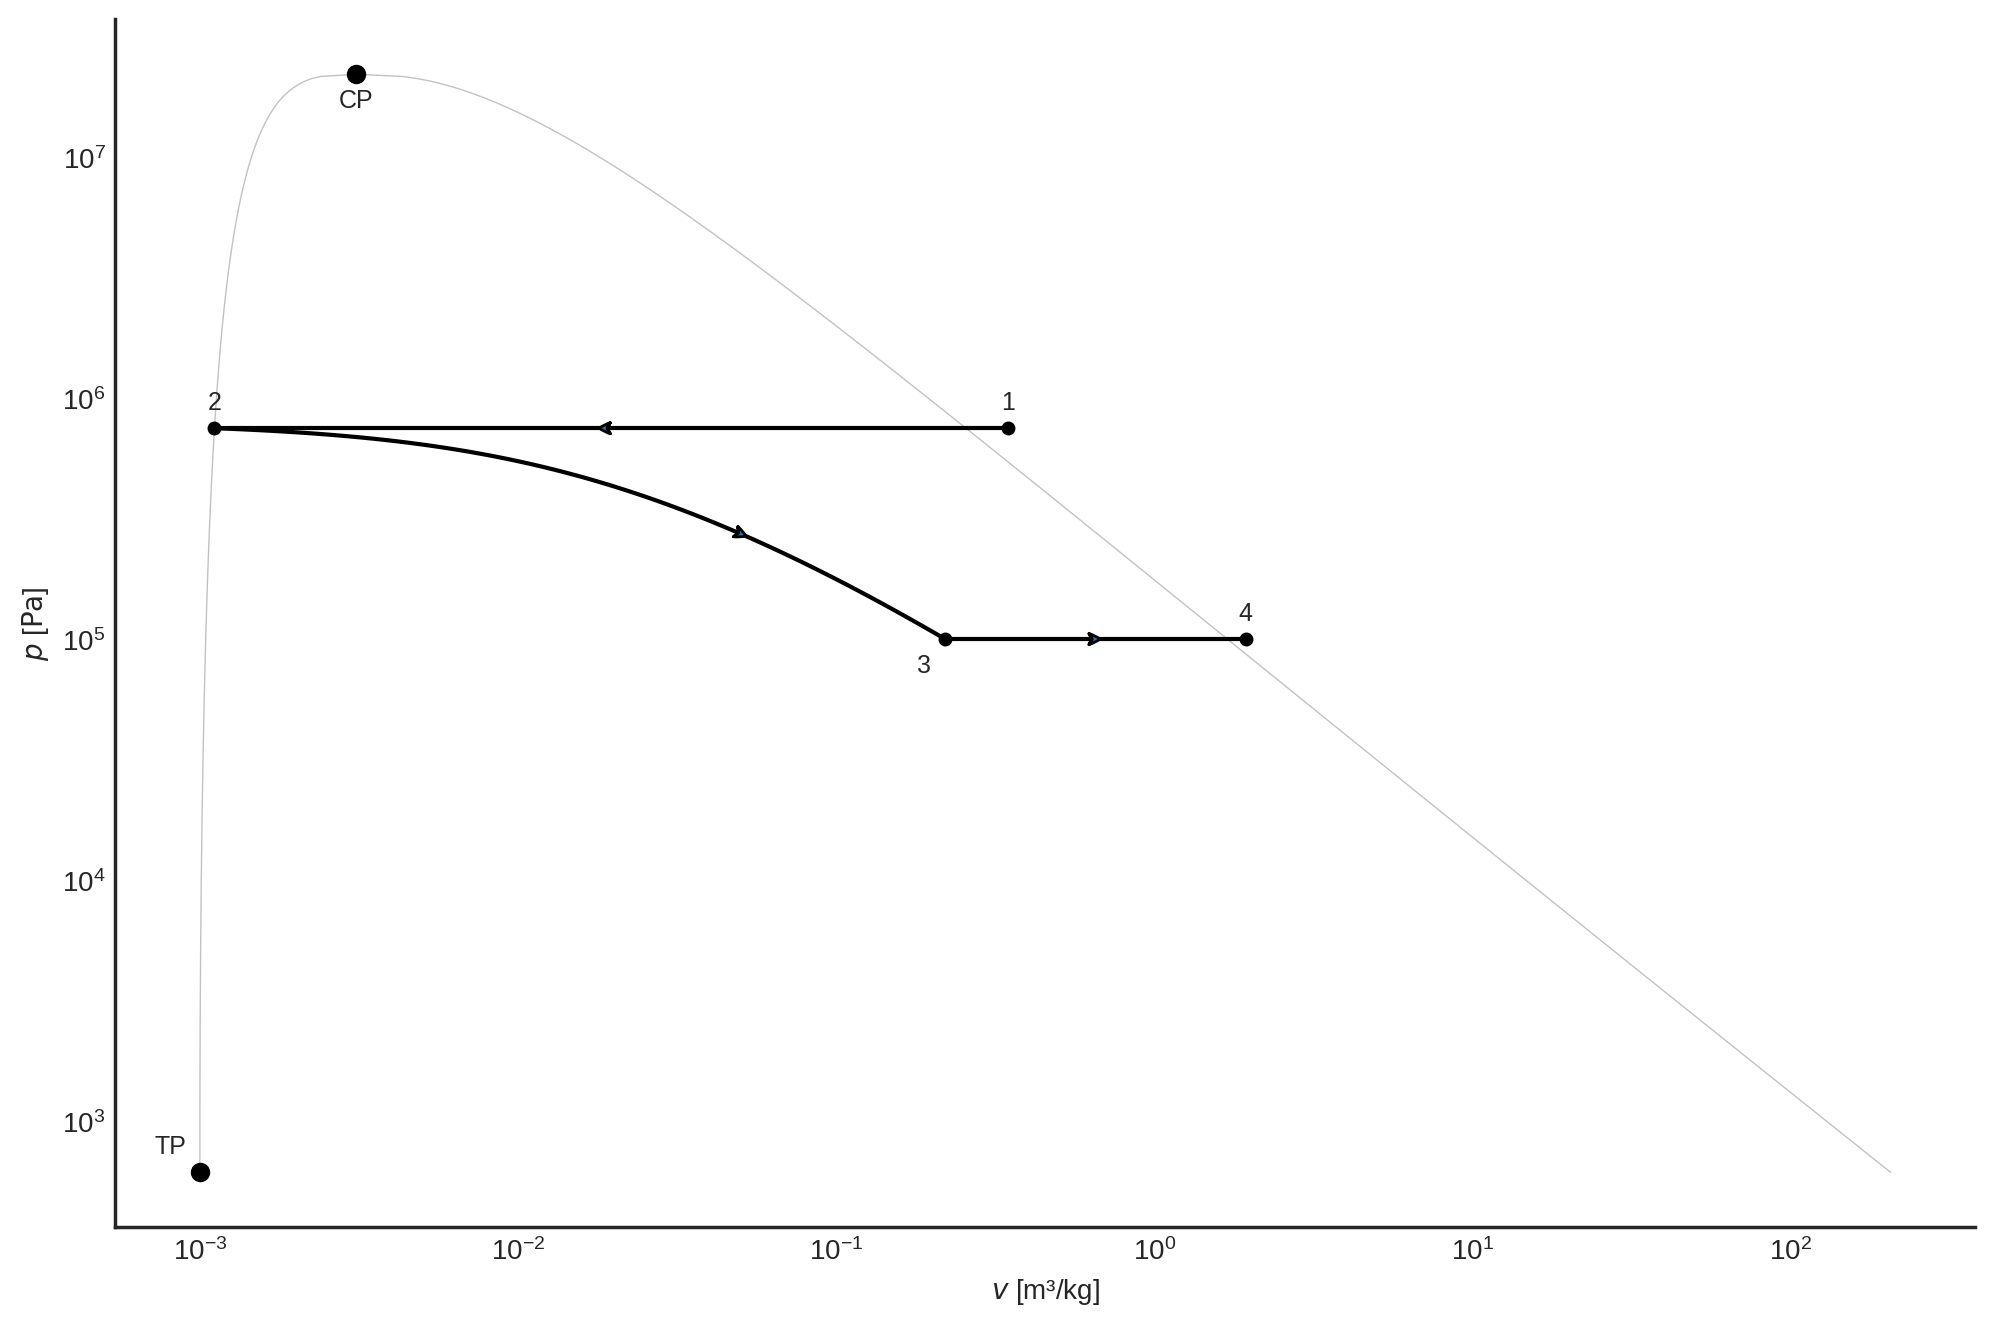

In [20]:
# Create pv_diagram instance
diag = water.pv_diagram(unit_system='SI_K') # Note: this is the only line that will be changed for the next few examples

# Plot Critial and Triple Points
diag.plot_triple_point(label_loc='northwest')
diag.plot_critical_point(label_loc='south')
# Plot States 1-3 using the .plot_state() method
diag.plot_state(states[1])
diag.plot_state(states[2])
diag.plot_state(states[3], label_loc='south west')
diag.plot_state(states[4])
# Connect the states with lines that illustrate the process paths
diag.plot_process(states[1], states[2], path='isobaric')
diag.plot_process(states[2], states[3], path='isenthalpic')
diag.plot_process(states[3], states[4], path='isobaric');

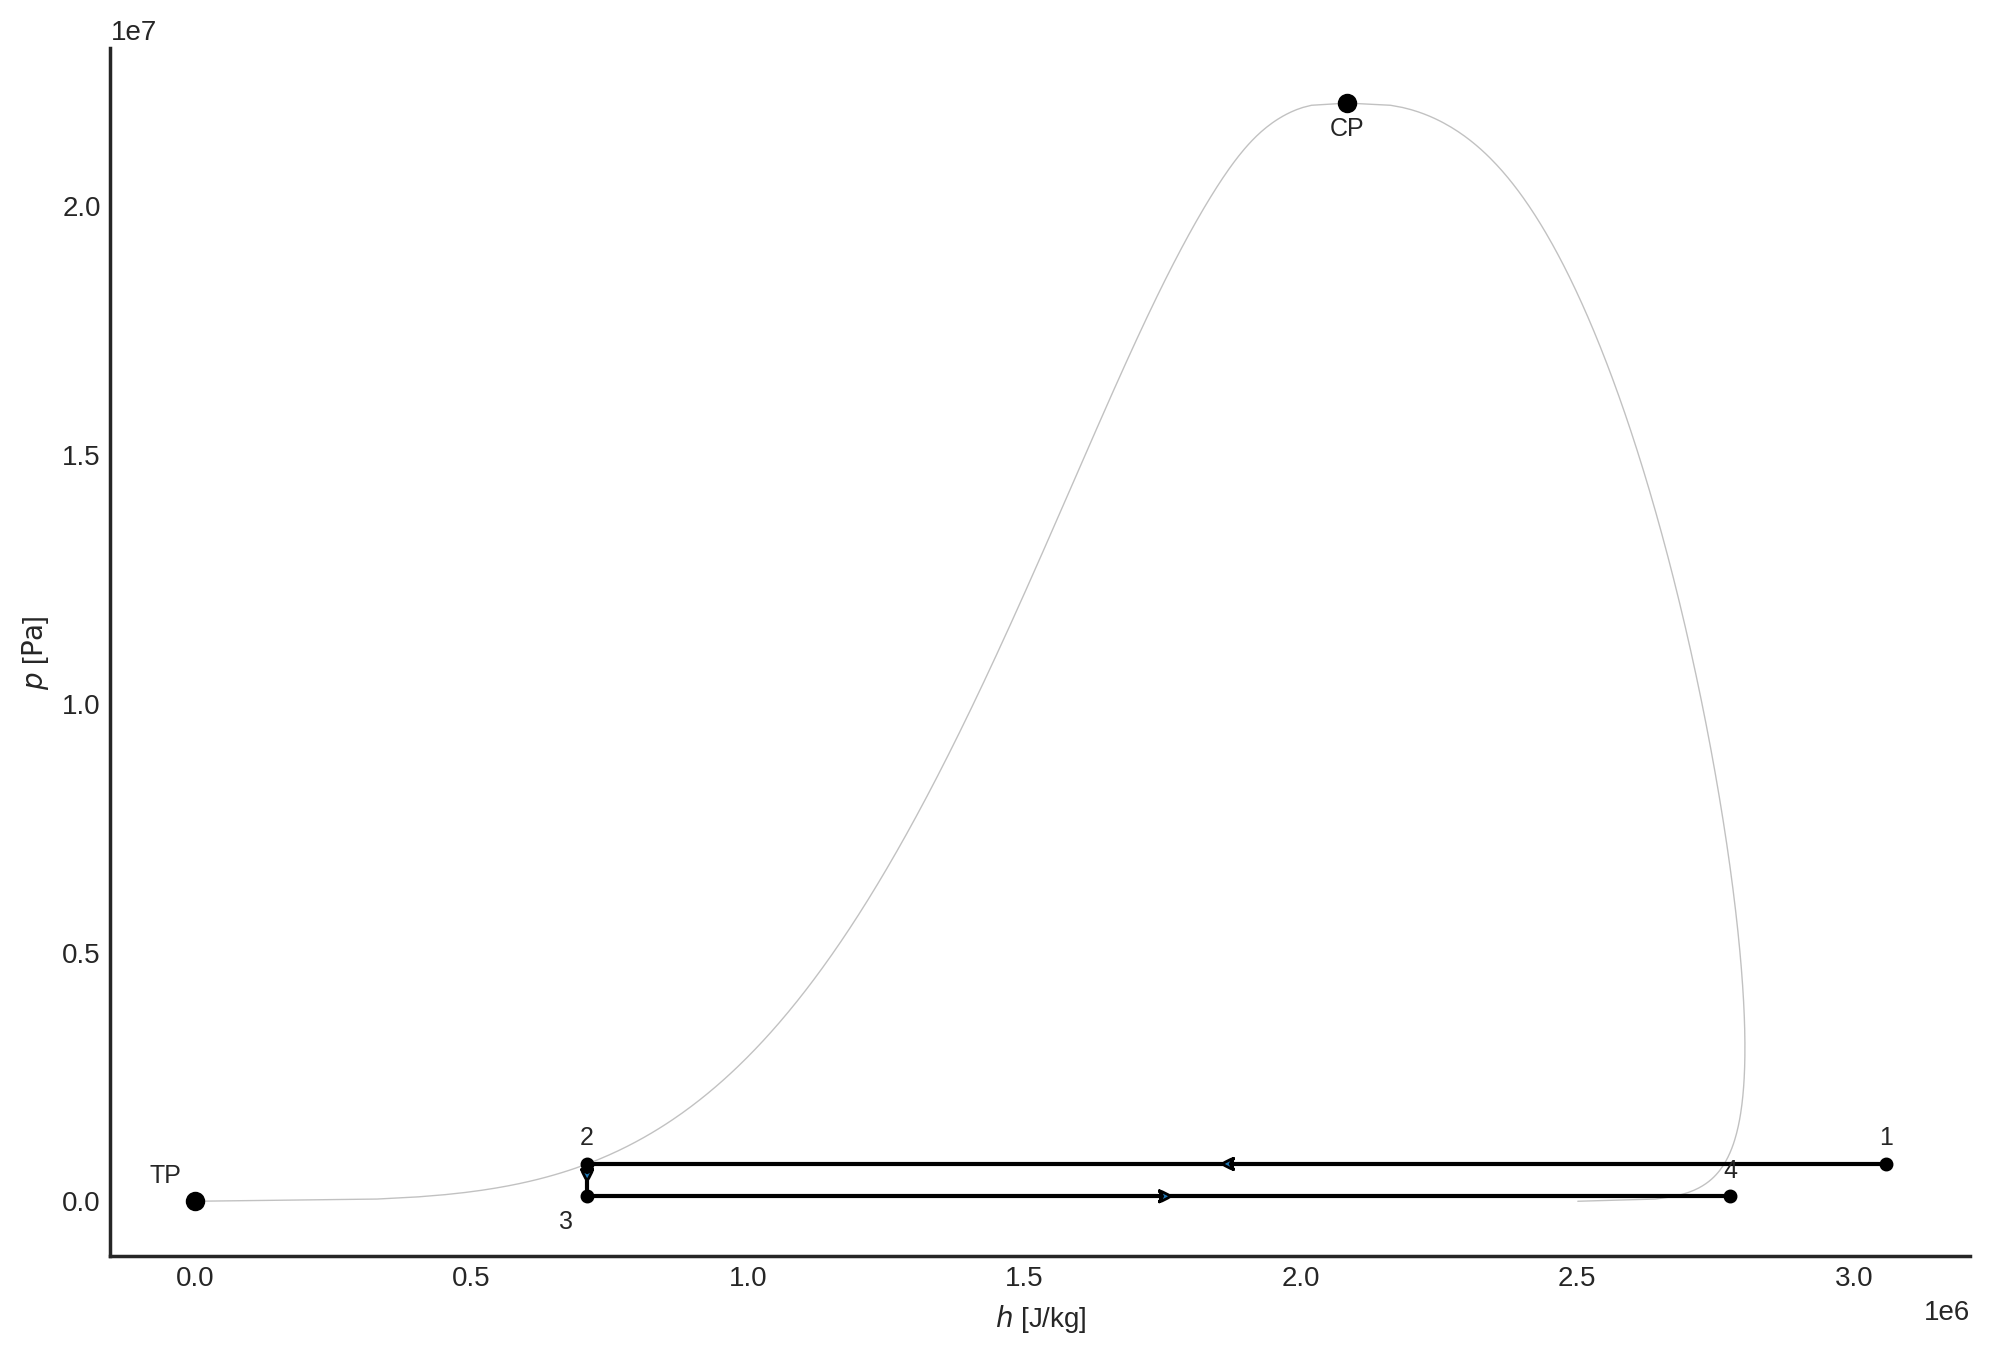

In [21]:
# Create ph_diagram instance
diag = water.ph_diagram(unit_system='SI_C') # Note: this is the only line that will be changed for the next few examples

# Plot Critial and Triple Points
diag.plot_triple_point(label_loc='northwest')
diag.plot_critical_point(label_loc='south')
# Plot States 1-3 using the .plot_state() method
diag.plot_state(states[1])
diag.plot_state(states[2])
diag.plot_state(states[3], label_loc='south west')
diag.plot_state(states[4])
# Connect the states with lines that illustrate the process paths
diag.plot_process(states[1], states[2], path='isobaric')
diag.plot_process(states[2], states[3], path='isenthalpic')
diag.plot_process(states[3], states[4], path='isobaric');

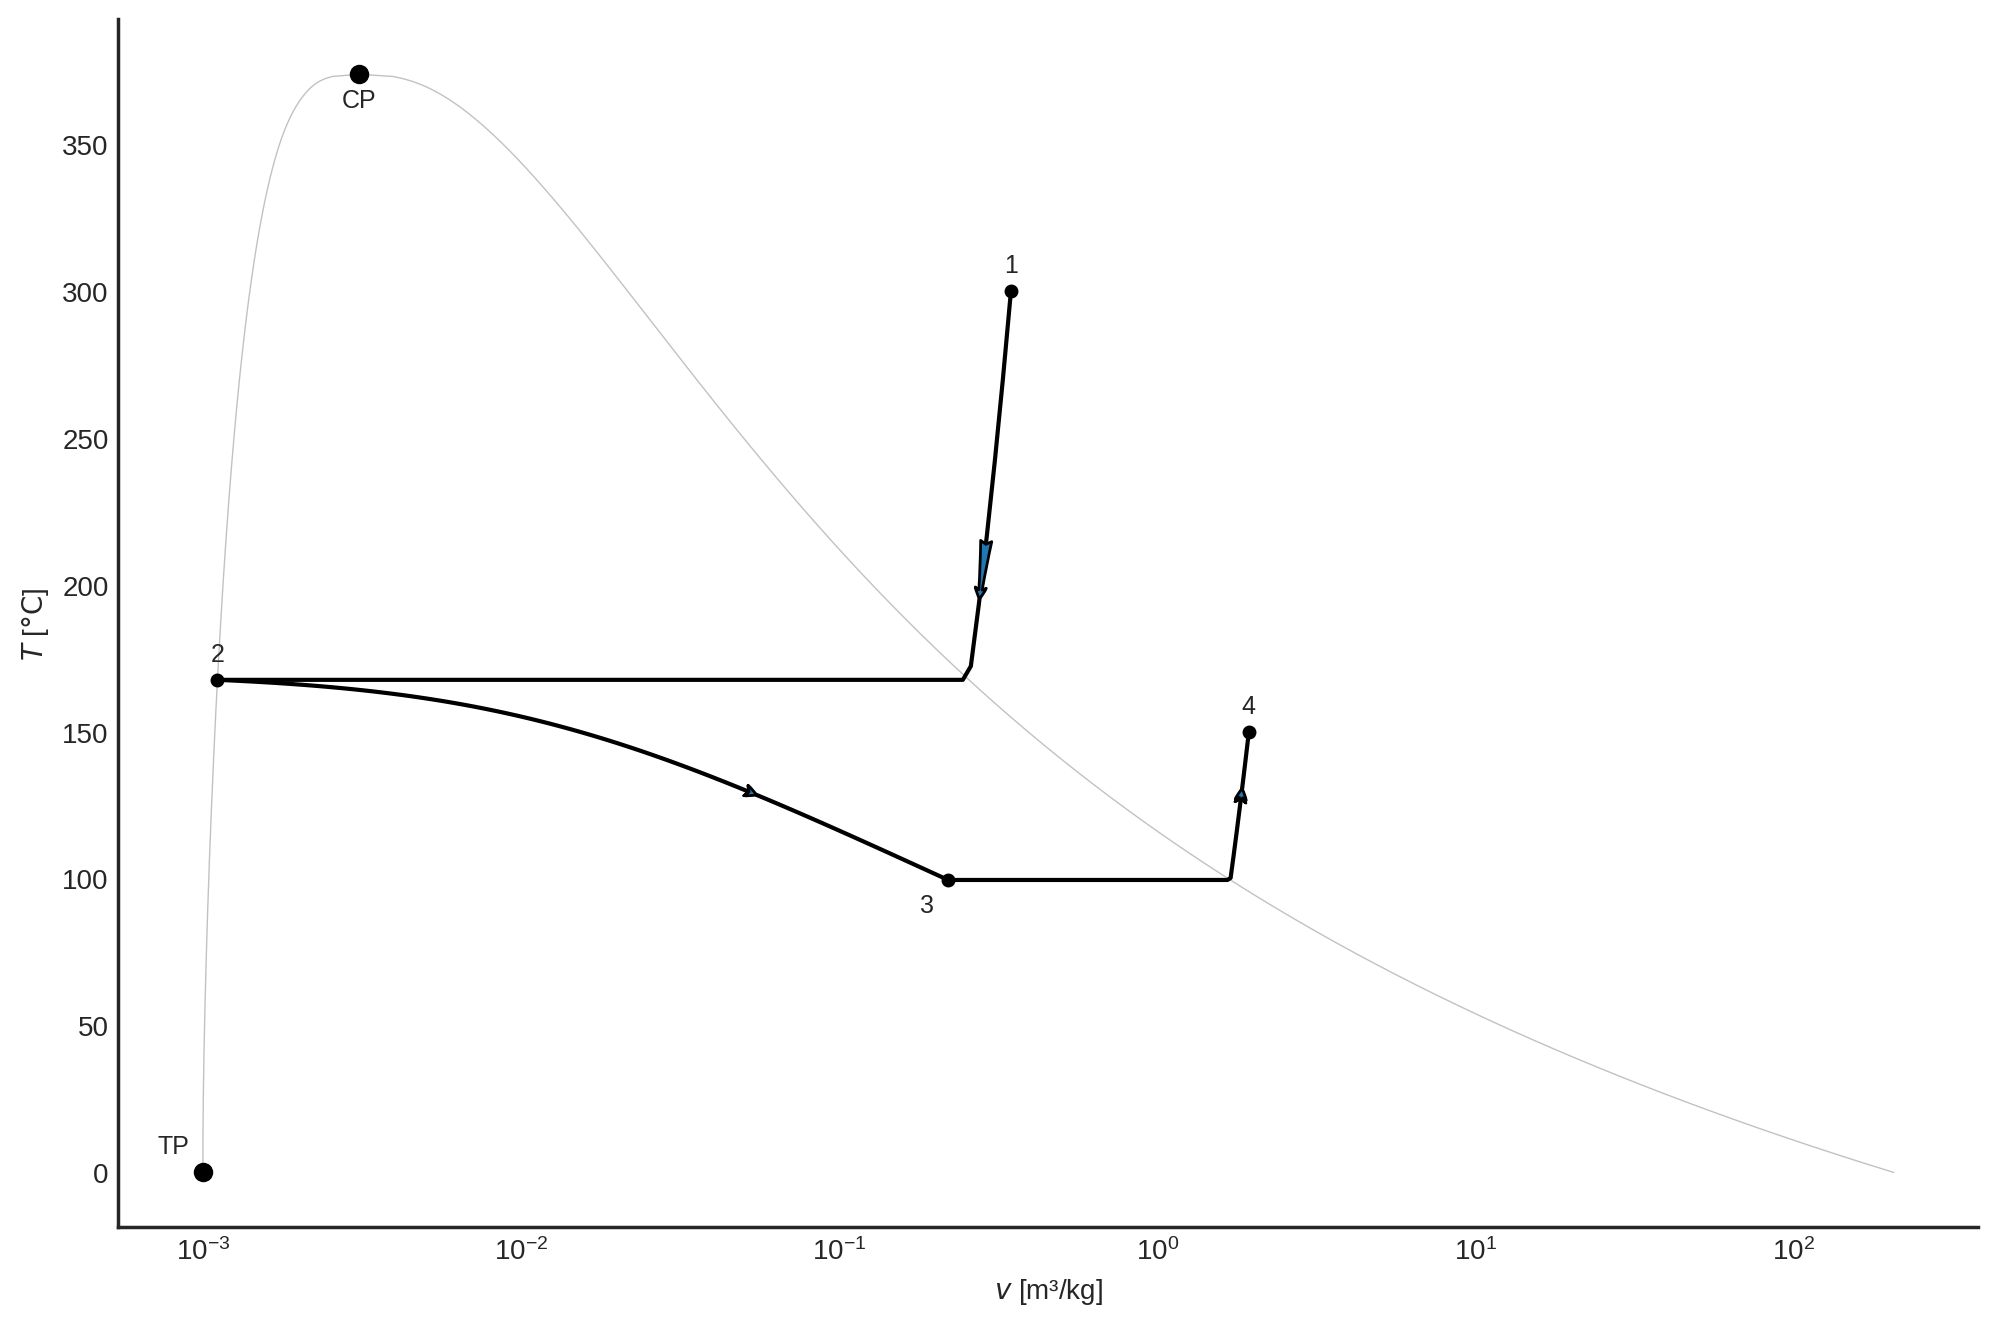

In [22]:
diag = water.Tv_diagram() # Note: this is the only line that will be changed for the next few examples

# Plot Critial and Triple Points
diag.plot_triple_point(label_loc='northwest')
diag.plot_critical_point(label_loc='south')
# Plot States 1-3 using the .plot_state() method
diag.plot_state(states[1])
diag.plot_state(states[2])
diag.plot_state(states[3], label_loc='south west')
diag.plot_state(states[4])
# Connect the states with lines that illustrate the process paths
diag.plot_process(states[1], states[2], path='isobaric')
diag.plot_process(states[2], states[3], path='isenthalpic')
diag.plot_process(states[3], states[4], path='isobaric');

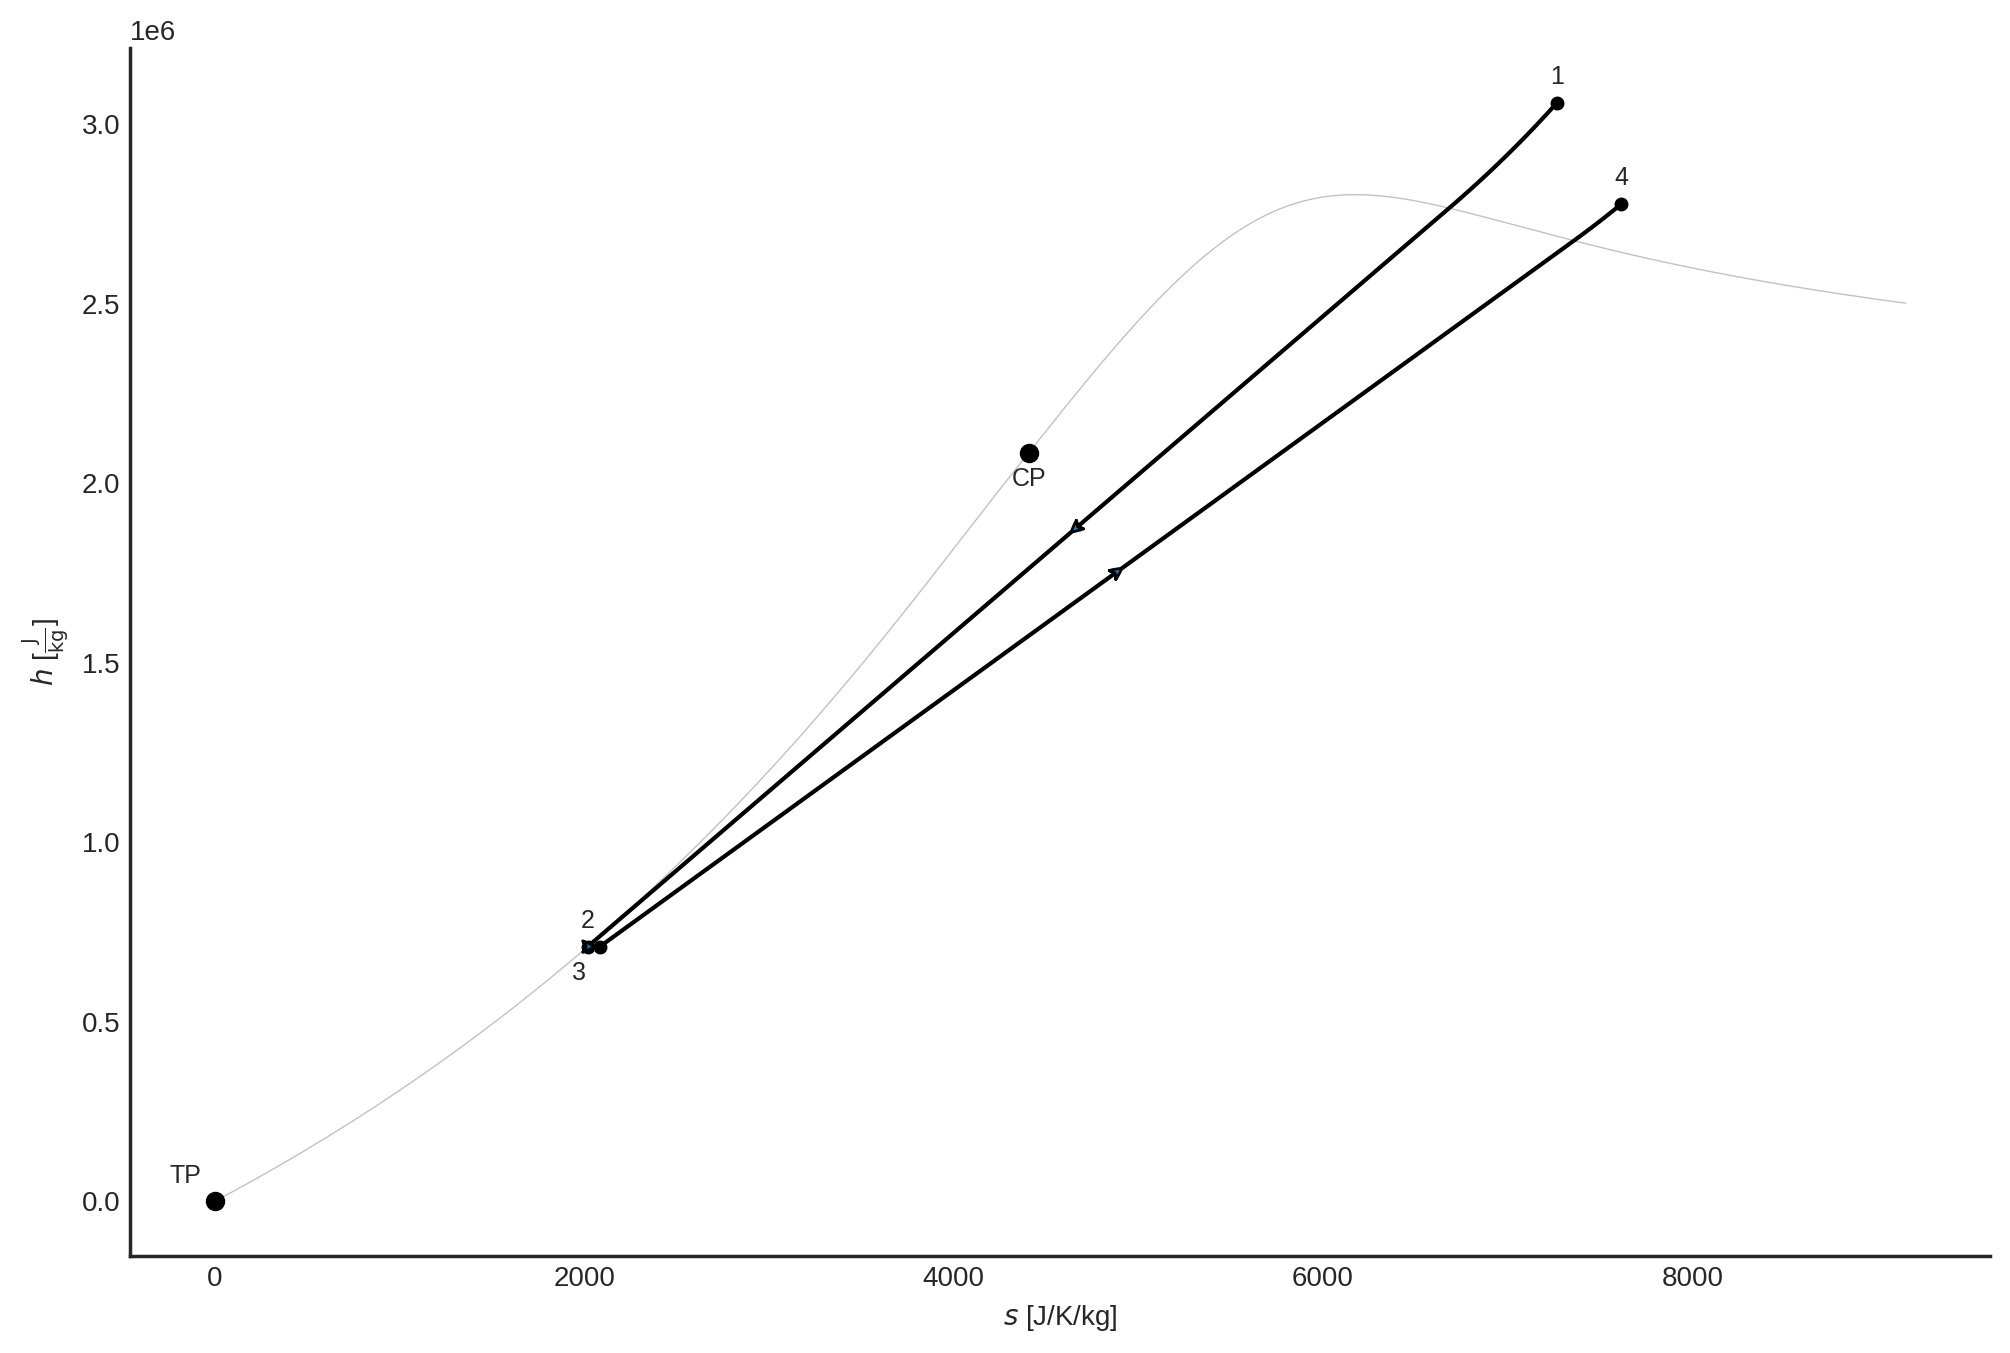

In [23]:
diag = water.hs_diagram() # Note: this is the only line that will be changed for the next few examples

# Plot Critial and Triple Points
diag.plot_triple_point(label_loc='northwest')
diag.plot_critical_point(label_loc='south')
# Plot States 1-3 using the .plot_state() method
diag.plot_state(states[1])
diag.plot_state(states[2])
diag.plot_state(states[3], label_loc='south west')
diag.plot_state(states[4])
# Connect the states with lines that illustrate the process paths
diag.plot_process(states[1], states[2], path='isobaric')
diag.plot_process(states[2], states[3], path='isenthalpic')
diag.plot_process(states[3], states[4], path='isobaric');

The ability to generate the previous 5 diagrams using the same set of commands (with only minor changes to the first line) provides an` excellent opportunity to write a loop to decrease the amount of code you need to write and maintain.

### Refrigerant Properties
All the commands demonstrated above will also work for any of the other pure/pseudopure substances, such as R-134a, supported by the underlying `CoolProp` library, a list of which can be obtained with the following code.

In [24]:
from kilojoule import realfluid
realfluid.fluids()

['Krypton',
 'Neopentane',
 'Fluorine',
 'R142b',
 'ParaHydrogen',
 'CycloPropane',
 'Ethylene',
 'n-Heptane',
 'HydrogenChloride',
 'EthylBenzene',
 'R410A',
 'R134a',
 'EthyleneOxide',
 '1-Butene',
 'R41',
 'R507A',
 'DimethylEther',
 'R141b',
 'DiethylEther',
 'n-Dodecane',
 'm-Xylene',
 'p-Xylene',
 'MethylStearate',
 'R116',
 'Water',
 'cis-2-Butene',
 'R125',
 'R161',
 'D4',
 'SES36',
 'Cyclopentane',
 'R236FA',
 'n-Octane',
 'Toluene',
 'MethylLinoleate',
 'Deuterium',
 'CarbonDioxide',
 'Propylene',
 'Propyne',
 'Helium',
 'Air',
 'R113',
 'R11',
 'Ethanol',
 'RC318',
 'Xenon',
 'R1233zd(E)',
 'Neon',
 'R404A',
 'IsoButene',
 'trans-2-Butene',
 'R407C',
 'MD2M',
 'HydrogenSulfide',
 'IsoButane',
 'D6',
 'o-Xylene',
 'n-Butane',
 'R40',
 'R114',
 'MethylLinolenate',
 'R23',
 'Benzene',
 'n-Decane',
 'n-Undecane',
 'Oxygen',
 'MDM',
 'Argon',
 'MD4M',
 'R1243zf',
 'R115',
 'Hydrogen',
 'n-Hexane',
 'HFE143m',
 'SulfurDioxide',
 'Ethane',
 'R152A',
 'Methane',
 'NitrousOxide',
 'P

To obtain properties for any of the supported fluids, simply supply the appropriate name when you instantiate the `realfluid.Properties()` classe, i.e.

h_ref = 285.0 kJ/kg
v_ref = 0.007292 m³/kg
s_ref = 1.2862 kJ/kg/Δ°C


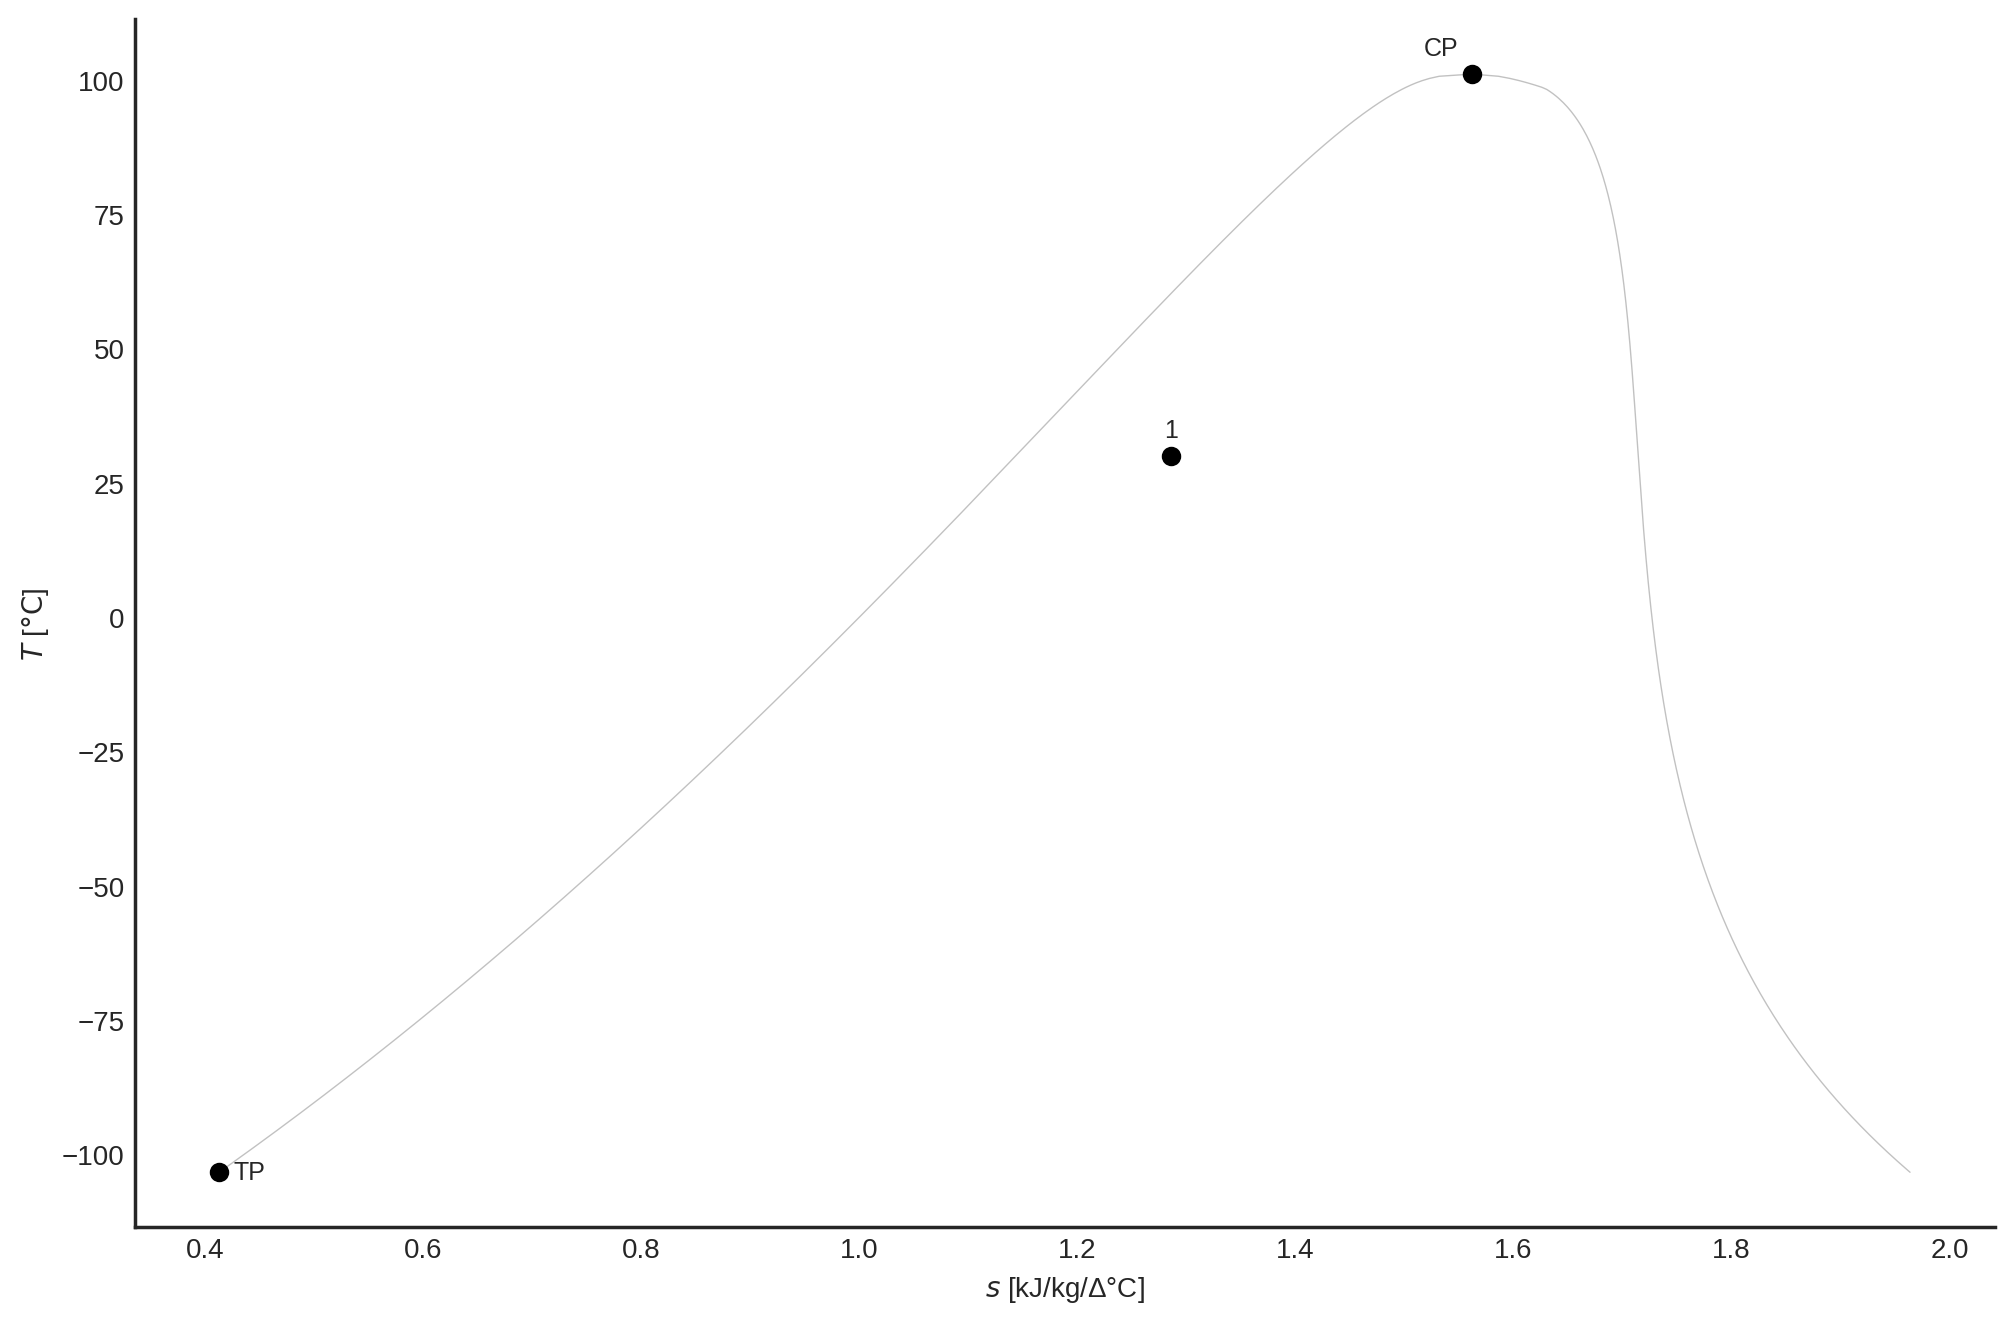

In [25]:
r134a = realfluid.Properties('R134a')
T_ref = Quantity(30,'degC')
x_ref = Quantity(0.25,'')              # Note: quality is dimensionless, so we define its units as an empty string

h_ref = r134a.h(T=T_ref, x=x_ref)
print(f'h_ref = {h_ref}')

v_ref = r134a.v(T=T_ref, x=x_ref)
print(f'v_ref = {v_ref}')

s_ref = r134a.s(T=T_ref, x=x_ref)
print(f's_ref = {s_ref}')

Ts_diagram = r134a.Ts_diagram()
Ts_diagram.plot_triple_point()
Ts_diagram.plot_critical_point()
Ts_diagram.plot_point(x=s_ref, y=T_ref, label='1');

### Air Properties
#### Ideal Gas Air Properties
Your textbook treats air as an ideal gas.  As a result, the internal energy and enthalpy values from the tables in the back of the book are only a function of temperature.  Therefore, you only need one independent, intensive property, temperature, to find the enthalpy at a state, since the ideal gas law is used to fix the other degree of freedom (therefore removing the need for a second independent property), i.e.  
$$h=h(T)\qquad\text{for an ideal gas only}$$
The entropy, however, is still dependent on the pressure (even with the ideal gas assumption applied).  Since the ideal gas air tables are only tabulated by temperature, it is not possible to look up the entropy directly with the pressure information also being accounted for.  To workaround this problem, your textbook tabulates $s^o$ rather than $s$.  Where the $^o$ is provided to remind you that it is only the temperature dependent portion of the change in entropy.  To get the full change in entropy between two states using the information from the tables, you can use
$$ \Delta s_{1\to2} = s_2^o-s_1^o - R\ln\frac{p_2}{p_1} $$
where $s_2^o$ and $s_1^o$ are from the tables, $R$ is the specific gas constant, and $p_2$ and $p_1$ are the pressures of the fluid in absolute units (i.e. *absolute pressure* not gauge pressure).

Ideal gas properties for air (and many other gases) can be obtained from the `PYroMat` library using the Burcat equations.  The `kilojoule` library provides a wrapper to access this library using the same syntax as we used for the real-fluid library above.  This wrapper is provided by the `idealgas` module.
> `from kilojoule import idealgas`  
> `air = idealgas.Properties('Air')`

In [26]:
from kilojoule import idealgas
air = idealgas.Properties('Air', unit_system='kSI_C')

In [27]:
%%showcalc
T_air = Quantity(450,'K')
p_air = Quantity(1.0,'atm')
h_air = air.h(T=T_air)
s_air = air.s(T=T_air,p=p_air)

\begin{align}
  T_{air} &=  450\ \mathrm{K} 
\end{align}

\begin{align}
  p_{air} &=  1.0\ \mathrm{atm} 
\end{align}

\begin{align}
  h_{air} &=  \mathrm{ \underset{ air }{ h } }\left( \mathrm{ T } = T_{air} \right)  = \mathrm{ \underset{ air }{ h } }\left( \mathrm{ T } = 450\ \mathrm{K} \right) = 149.37\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  s_{air} &=  \mathrm{ \underset{ air }{ s } }\left( \mathrm{ T } = T_{air}, \mathrm{ p } = p_{air} \right)  = \mathrm{ \underset{ air }{ s } }\left( \mathrm{ T } = 450\ \mathrm{K}, \mathrm{ p } = 1.0\ \mathrm{atm} \right) = 7.114\ \frac{\mathrm{kJ}}{\left(\mathrm{kg} \cdot \mathrm{Δ°C}\right)}
\end{align}



## Pseudopure Real Fluid Air Properties
While we can obtain reasonably accurate answer for many engineering systems that involve air using the ideal gas assumption, there are cases when we need to treat air as a real fluid instead. The `CoolProp` library used in `kilojoule` does not treat air as an ideal gas, rather it treats air as a *pseudopure fluid*.  In this context we call the air a *pseudopure fluid* because it is really a mixture (approximately $79\%\text{N}_2$ and $21\%\text{O}_2$) but we treat it as if it were a pure fluid with known properties.  As a result, you still need to provide two independent, intensive properties when using the `kilojoule.realfluid.Properties` class with air.

In [28]:
air = realfluid.Properties(fluid='Air')

In [29]:
%%showcalc
T_air = Quantity(450,'K')
p_air = Quantity(1.0,'atm')
h_air = air.h(T=T_air, p=p_air)

\begin{align}
  T_{air} &=  450\ \mathrm{K} 
\end{align}

\begin{align}
  p_{air} &=  1.0\ \mathrm{atm} 
\end{align}

\begin{align}
  h_{air} &=  \mathrm{ \underset{ air }{ h } }\left( \mathrm{ T } = T_{air}, \mathrm{ p } = p_{air} \right)  = \mathrm{ \underset{ air }{ h } }\left( \mathrm{ T } = 450\ \mathrm{K}, \mathrm{ p } = 1.0\ \mathrm{atm} \right) = 578.13\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}



At this point it is worth pointing out that the ideal gas tables and the real fluid tables gave significantly different answers for the enthalpy in the previous example (neither of which are in agreement with your textbook).  This is because enthalpy is an integrated property and the libraries used to evaluate these properties use different reference states (or starting points for the integration).  While this may seem like a major problem, it is not.  The vast majority of our thermodynamics calcuations will look at changes in intergrated properties, such as internal energy, enthalpy, entropy, Gibbs function, etc., rather than their absoute values.  So as long as you pull all your properties from the same table your final results will be (nearly) the same regardless of which set of tables you used.  However, you cannot mix and match between different property sources.

#### Humid Air
Later in this course we will study mixtures, rather than just pure substances.  One common mixture encountered in many engineering applications is humid air (a mixture of air and water vapor).  Because we will be treating humid air as a mixture of two substances (with air still being treated as a pseudopure fluid), we will need three independent intensive properties to fix the state.  The fluid properties for humid air can be reached in the same way as the pure/pseudopure substance, with the exception that you need to provide three independent properties to fix the state instead of two and you need to use the `humidair.Properties` class instead of the `realfluid.Properties` class.

In [30]:
from kilojoule.templates.humidair_default import *


In [31]:
%%showcalc
"Start with air at 30 C, 50% relative humidity, at 1 atmosphere"
T[1] = Quantity(30,'degC')
rel_hum[1] = 0.5
p[1] = Quantity(1,'atm')

"Evaluate dependent properties at state 1"
T_wb[1] = humidair.T_wb(T[1],p[1],rel_hum[1])
h[1] = humidair.h(T[1],p[1],rel_hum[1])
v[1] = humidair.v(T[1],p[1],rel_hum[1])
s[1] = humidair.s(T[1],p[1],rel_hum[1])
omega[1] = humidair.omega(T[1],p[1],rel_hum[1])

"Use a simple cooling process to lower the temperature and dehumidify by cooling to 10 C"
T[2] = Quantity(10,'degC')
rel_hum[2] = 1
p[2] = p[1]

states.fix(2,humidair)

Start with air at 30 C, 50% relative humidity, at 1 atmosphere
\begin{align}
  {T}_{ 1 } &=  30\ \mathrm{°C} 
\end{align}

\begin{align}
  {rel_{hum}}_{ 1 } &=  0.5 
\end{align}

\begin{align}
  {p}_{ 1 } &=  1\ \mathrm{atm}  = 101.33\ \mathrm{kPa} 
\end{align}

Evaluate dependent properties at state 1
\begin{align}
  {T_{wb}}_{ 1 } &=  \mathrm{ \underset{ humidair }{ T\_wb } }\left( {T}_{ 1 }, {p}_{ 1 }, {rel_{hum}}_{ 1 } \right)  = \mathrm{ \underset{ humidair }{ T\_wb } }\left( 30\ \mathrm{°C}, 101.33\ \mathrm{kPa}, 0.5 \right) = 22.001\ \mathrm{°C}
\end{align}

\begin{align}
  {h}_{ 1 } &=  \mathrm{ \underset{ humidair }{ h } }\left( {T}_{ 1 }, {p}_{ 1 }, {rel_{hum}}_{ 1 } \right)  = \mathrm{ \underset{ humidair }{ h } }\left( 30\ \mathrm{°C}, 101.33\ \mathrm{kPa}, 0.5 \right) = 64.356\ \frac{\mathrm{kJ}}{\mathrm{kg\_a}}
\end{align}

\begin{align}
  {v}_{ 1 } &=  \mathrm{ \underset{ humidair }{ v } }\left( {T}_{ 1 }, {p}_{ 1 }, {rel_{hum}}_{ 1 } \right)  = \mathrm{ \underset{ humidair }{ v } }\left( 30\ \mathrm{°C}, 101.33\ \mathrm{kPa}, 0.5 \right) = 0.87696\ \frac{\mathrm{m}^{3}}{\mathrm{kg\_a}}
\end{align}

\begin{align}
  {s}_{ 1 } &=  \mathrm{ \underset{ humidair }{ s } }\left( {T}_{ 1 }, {p}_{ 1 }, {rel_{hum}}_{ 1 } \right)  = \mathrm{ \underset{ humidair }{ s } }\left( 30\ \mathrm{°C}, 101.33\ \mathrm{kPa}, 0.5 \right) = 0.22826\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg\_a}\right)}
\end{align}

\begin{align}
  {\omega}_{ 1 } &=  \mathrm{ \underset{ humidair }{ omega } }\left( {T}_{ 1 }, {p}_{ 1 }, {rel_{hum}}_{ 1 } \right)  = \mathrm{ \underset{ humidair }{ omega } }\left( 30\ \mathrm{°C}, 101.33\ \mathrm{kPa}, 0.5 \right) = 0.013373\ \frac{\mathrm{kg\_water}}{\mathrm{kg\_a}}
\end{align}

Use a simple cooling process to lower the temperature and dehumidify by cooling to 10 C
\begin{align}
  {T}_{ 2 } &=  10\ \mathrm{°C} 
\end{align}

\begin{align}
  {rel_{hum}}_{ 2 } &=  1 
\end{align}

\begin{align}
  {p}_{ 2 } &=  {p}_{ 1 }  = 101.33\ \mathrm{kPa} 
\end{align}

Fixing state 2 using previously defined values.<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>$T$ [°C]</th>
      <th>$p$ [kPa]</th>
      <th>$v$ [m³/kg_a]</th>
      <th>$h$ [kJ/kg_a]</th>
      <th>$h_{w}$ [Btu/lb_water]</th>
      <th>$s$ [kJ/K/kg_a]</th>
      <th>$T_{wb}$ [°C]</th>
      <th>$T_{dp}$ [°C]</th>
      <th>$rel_{hum}$ []</th>
      <th>$\omega$ [kg_water/kg_a]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>10</td>
      <td>101.325</td>
      <td>0.811596</td>
      <td>29.354502</td>
      <td>18.107863</td>
      <td>0.107866</td>
      <td>10.0</td>
      <td>10.0</td>
      <td>1.0</td>
      <td>0.007663</td>
    </tr>
  </tbody>
</table>
<br />


In [44]:
states.display();

,$T$ [°C],$p$ [kPa],$v$ [m³/kg_a],$h$ [kJ/kg_a],$h_{w}$ [Btu/lb_water],$s$ [kJ/K/kg_a],$T_{wb}$ [°C],$T_{dp}$ [°C],$rel_{hum}$ [],$\omega$ [kg_water/kg_a]
1,30,101.325,0.876956,64.355677,-,0.228260,22.000878,-,0.5,0.013373
2,10,101.325,0.811596,29.354502,18.107863,0.107866,10.000000,10.0,1.0,0.007663


The `kilojoule` library provides a routine for drawing psychrometric charts to visualize humid air systems.  *Note: this can be used to generate psychrometric charts for non-standard pressures and unit systems*

In [45]:
psych = humidair.psychrometric_chart()
psych.plot_state(states[1])
psych.plot_state(states[2],label_loc='south east')
psych.plot_process(states[1],states[2],path='simple cooling');

ValueError: At least one value in the dash list must be positive

<Figure size 1200x800 with 1 Axes>

## Equation Formatting
Simply arriving at the correct answer for a problem is only half the battle.  You then need to be able to communicate your methods and results to a range of audiences (in this class your instructor).  This should be done following technical writing conventions with a narrative discussion of your process including properly formatted equations and sample calculations.  It is not sufficient to simply submit your code and a final numerical answer or a long list of equations without any explanation.

Throughout your academic career you have learned many different conventions (shorthand) for writing down mathematical concepts, i.e. to show a variable is being raised to a power we put that power in the superscript $x^2$.  However, there is no key on your keyboard to make that 2 shrink in size and move above the variable.  You'll also notice that the $x$ was not written in the same font as the rest of the text.  It is convention for variables to be written in italics rather than normal font because it helps the reader quickly distinguish them from regular text (you probably already do this in your head without realizing it).

There are a few ways to create properly formatted equations.  While the Microsoft equation editor has improved greatly in recent years, the most powerful tool is the formatting language $\LaTeX$.  $\LaTeX$ has been around for many decades and it was developed to represent complex mathematical expressions using plain text (just the keys on a regular keyboard).  While there is a bit of a learning curve if you choose to start using $\LaTeX$, your efforts will pay off many times over as you will find that most scientific/mathematical software has $\LaTeX$ support built in.  In fact, learning $\LaTeX$ will even make you faster when you do need to use Microsoft Equation editor (in Word or PowerPoint) because it includes support for many $\LaTeX$ symbol names.

The Jupyter notebook this document is being created in has built-in $\LaTeX$ support.  In some of the earlier examples you may have noticed special symbols in some of the output, such as $\Delta^\circ\text{C}$.  Those were created using $\LaTeX$ formatting and the special symbols in this explanation were also created using $\LaTeX$ formatting (if you are reading this in a live notebook, double-click on this cell to see the source code written in Markdown syntax).  You can include inline math, $f(x)=5x^2-3x+2$, or you can include "display" math 
$$f(x) = \int_0^\infty\frac{3}{2}x\ dx$$

To help you convert your calculations into technical writing format, the `kilojoule` library provides a few convenience functions in its `display` module to automate the $\LaTeX$ creation process.  The `%%showcalc` iPython magic command will trigger a process that attempts to convert the code in the current cell to $\LaTeX$ and show the progression of the calculations from symbolic to final numerical form.

To demonstrate the use of `%%showcalc` we'll step through the evaluation and display of the function $\psi=ax-cx^2+\frac{b}{x}$.  We'll start by defining values for `a`, `b`, and `x`

In [46]:
# load the showcalc magic library
# Note: this step is not required if you load one of the modules from kilojoule.templates
from kilojoule.magics import ShowCalcMagics
from kilojoule.units import Quantity

In [47]:
%%showcalc
a = Quantity(3.2,'psi')
b = Quantity(1,'kPa')
x = 2

\begin{align}
  a &=  3.2\ \mathrm{psi} 
\end{align}

\begin{align}
  b &=  1\ \mathrm{kPa} 
\end{align}

\begin{align}
  x &=  2 
\end{align}



In this example, the lines defining `a`, `b`, and `x` were simple definitions involving no mathematical operations, so they are shown in simple form.  By placing the line `%%showcalc` at the beginning of the cell, we trigger a sequence where the code in the cell is parsed for strings of letters resembling equations and displays them with $\LaTeX$ formatting.  

In the next cell we will define `c` as being equal to `a`. 

In [48]:
%%showcalc
c = a

\begin{align}
  c &=  a  = 3.2\ \mathrm{psi} 
\end{align}



In this example, we see 3 terms rather than two.  This line still has no mathematical operations, but there is a train of logic where we are setting $c$ equal to $a$.  While it is important to show the numerical value of $c$ as being $3.2\ \mathrm{psi}$, it is also important (possibly more important) to show the process that led to $c$ having that value, so we show the symbolic form of the expression $c=a$ as well.

Let's now evaluate a full equation with mathematical operations.

In [49]:
%%showcalc
psi = a*x - c*x**2 + b/x 

\begin{align}
  \psi &=    a  \cdot  x  -  c  \cdot  {x}^{2}   + \frac{ b }{ x } \\
    &=   3.2\ \mathrm{psi}  \cdot   2   -  3.2\ \mathrm{psi}  \cdot  { 2 }^{2}   + \frac{ 1\ \mathrm{kPa} }{  2  }\\
    &= -6.3275\ \mathrm{psi}
\end{align}



In this example the equation is expressed in 3 lines.  The first line shows the symbolic form of the equation, which shows the reader the process or logic that is being applied.  The second line shows numerical values in place of each symbol, which shows the propagation of information from earlier calculations.  Finally the third line shows the numerical value resulting from the calculation.  *Note: this is the form you should use when writing out calculations by hand as well.*  Also, notice that the variable name `psi` was recognized as being a Greek letter and converted to the $\LaTeX$ equivalent of `\psi`.  This will work for most cases if you define your variable names carefully.

Using the `%%showcalc` command will allow you to properly format your calculations, but you will still need to provide a narrative discussion to describe your process to the reader.  You can do this in a Jupyter notebook by interspersing `Markdown` cells like this one between your equations, or you can place your narrative in your code as strings or comments that will be shown in your output using the `--comments` flag to `%%showcalc`.

In [51]:
%%showcalc --comments

"Strings that are executed without assignment will be printed in the output as `Markdown` text"
# You can place comments in your code to describe your process and:
# * Show them as `Markdown` text if the `--comments` option is supplied to the `%%showcalc` command
# * or hide them in the output if the `--no-comments` option is supplied to the  `%%showcalc` command
# The comments will be processed as `Markdown` so you can apply **formatting** if desired
"For instance, let's calculate the amount of heat transfer required to decrease the temperature of air from 400 K to 300 K in a constant pressure process assuming constant specific heat.  We can start by defining some known parameters,"
T_1 = Quantity(400,'K')
T_2 = Quantity(300,'K')
c_p = Quantity(1.005,'kJ/kg/K')

"We can then solve the first law for $Q$ and substitute $c_p\Delta T$ for $\Delta h$"
Q_1_to_2 = c_p*(T_2-T_1)


Strings that are executed without assignment will be printed in the output as `Markdown` text

 You can place comments in your code to describe your process and:
 * Show them as `Markdown` text if the `--comments` option is supplied to the `%%showcalc` command
 * or hide them in the output if the `--no-comments` option is supplied to the  `%%showcalc` command
 The comments will be processed as `Markdown` so you can apply **formatting** if desired
For instance, let's calculate the amount of heat transfer required to decrease the temperature of air from 400 K to 300 K in a constant pressure process assuming constant specific heat.  We can start by defining some known parameters,

\begin{align}
  T_{1} &=  400\ \mathrm{K} 
\end{align}


\begin{align}
  T_{2} &=  300\ \mathrm{K} 
\end{align}


\begin{align}
  c_{p} &=  1.005\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}



We can then solve the first law for $Q$ and substitute $c_p\Delta T$ for $\Delta h$

\begin{align}
  Q_{1\to{}2} &=   c_{p}  \cdot  \left(  T_{2} - T_{1}  \right)  \\
    &=  1.005\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  \cdot  \left(  300\ \mathrm{K} - 400\ \mathrm{K}  \right) \\
    &= -100.5\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}




The `kilojoule` library also provides a quick way to show the current value of all the quantities and property tables defined in the local namespace using the `display.Summary()` class, just the quantities using `display.Quantities()`, or just the property tables using `display.QuantityTables()`

In [52]:
import kilojoule as kj

kj.display.Summary(n_col=4);

<IPython.core.display.Latex object>

,$T$ [°C],$p$ [kPa],$v$ [m³/kg_a],$h$ [kJ/kg_a],$h_{w}$ [Btu/lb_water],$s$ [kJ/K/kg_a],$T_{wb}$ [°C],$T_{dp}$ [°C],$rel_{hum}$ [],$\omega$ [kg_water/kg_a]
1,30,101.325,0.876956,64.355677,-,0.228260,22.000878,-,0.5,0.013373
2,10,101.325,0.811596,29.354502,18.107863,0.107866,10.000000,10.0,1.0,0.007663


In [40]:
kj.display.Quantities(n_col=6);

In [41]:
kj.display.QuantityTables();